<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Entrenamiento de redes *Feed-Forward* vı́a GD y variantes (SGD, mini-*batches*), *momentum*, regularización y tasa de aprendizaje adaptiva.
* Evaluación de redes *Feed-Forward* vı́a validación cruzada (cross-validation).
* Rol de capas ocultas y mayor profundidad (*Deep Learning*).
* Identificar el gradiente desvaneciente.
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 26 de Octubre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<margarita.bugueno.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<cvalle@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF395-II-2018]

<hr style="height:2px;border:none"/>

#### Paquetes instalación

Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de anaconda (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como sklearn, una librería simple y de facil acceso para data science, keras en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como backend TensorFlow o Theano, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de computer science como *numpy, matplotlib, pandas,* además de claramente *jupyter*.

* Descargar anacona
* Luego de instalar Anaconda y tenerla en el path de su computador crear un entorno virtual:
```
conda create -n redesneuronales python=version
```
con version, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilziar.

* Acceder al ambiente creado
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu
```

*  Para salir del entorno
```
source deactivate redesneuronales
```

<hr style="height:2px;border:none"/>
La tarea se divide en secciones:

[1.](#primero) Predicción de Entalpía de Atomización  
[2.](#segundo) *Deep Networks*  
[3.](#tercero) Entendimiento de imágenes de personas

<a id="primero"></a>
## 1. Predicción de Entalpía de Atomización


Las simulaciones de propiedades moleculares son computacionalmente costosas y requieren de un arduo trabajo científico. El objetivo de esta sección corresponde a la utilización de métodos de aprendizaje automático supervisado (Redes Neuronales Artificiales) para predecir propiedades moleculares, en este caso la Energía de Atomización o Entalpía de Atomización, a partir de una base de datos de simulaciones obtenida mediante __[Quantum Espresso](http://www.quantum-espresso.org/)__. Si esto se lograse hacer con gran precisión, se abrirían muchas posibilidades en el diseño computacional y el descubrimiento de nuevas moléculas, compuestos y fármacos.

<img src="https://pubs.rsc.org/services/images/RSCpubs.ePlatform.Service.FreeContent.ImageService.svc/ImageService/Articleimage/2012/NR/c2nr11543c/c2nr11543c-f4.gif" title="Title text" width="40%"/>


La **entalpía de atomización** es la cantidad de variación de entalpía cuando los enlaces de un compuesto se rompen y los componentes se reducen a átomos individuales. Tal como se ha indicado, su tarea es la de predecir dicho nivel a partir de los atributos enunciados en el dataset puesto a vuestra disposición en *moodle*.

> a) Construya un *dataframe* con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas.

In [151]:
import pandas as pd

datos = pd.read_csv('roboBohr.csv')
datos.shape
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


Unnamed: 0             0             1             2             3  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean    8139.041805    115.715266     22.445723     20.474191     18.529573   
std     4698.182820    113.198503      8.659586      7.670481      6.485777   
min        0.000000     36.858105      2.906146      0.000000      0.000000   
25%     4068.250000     73.516695     17.969345     16.228071     15.165862   
50%     8142.500000     73.516695     20.662511     18.631287     17.690729   
75%    12207.750000     73.516695     21.132432     20.739496     18.712895   
max    16272.000000    388.023441     73.563510     66.269180     66.268891   

                  4             5             6             7             8  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      17.169350     15.816888     15.133152     14.471534     13.960759   
std        5.512560      4.179691      3.885091      3.503075      3.357136   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       13.744092     13.653146     13.637784     12.759519     12.587359   
50%       16.020040     15.156646     13.848274     13.659233     13.652832   
75%       18.297501     17.639688     16.154918     15.499474     14.900585   
max       66.268756     66.268196     66.264158     66.258487     66.258177   

           ...               1267          1268          1269          1270  \
count      ...       16242.000000  16242.000000  16242.000000  16242.000000   
mean       ...           0.000134      0.000133      0.003879      0.000131   
std        ...           0.002728      0.002705      0.043869      0.002676   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           0.062225      0.061999      0.500000      0.061534   

               1271          1272          1273          1274    pubchem_id  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean       0.000129      0.002155      0.000127      0.001201  33107.484300   
std        0.002633      0.032755      0.002594      0.024472  23456.785147   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.000000      0.000000      0.000000      0.000000  12298.250000   
50%        0.000000      0.000000      0.000000      0.000000  27731.500000   
75%        0.000000      0.000000      0.000000      0.000000  55020.750000   
max        0.059760      0.500000      0.057834      0.500000  74980.000000   

                Eat  
count  16242.000000  
mean     -11.178969  
std        3.659133  
min      -23.245373  
25%      -13.475805  
50%      -10.835211  
75%       -8.623903  
max       -0.789513  

[8 rows x 1278 columns]

In [152]:
datos.drop(columns=['Unnamed: 0', 'pubchem_id'], axis=1, inplace=True)
datos.describe()

0             1             2             3             4  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean     115.715266     22.445723     20.474191     18.529573     17.169350   
std      113.198503      8.659586      7.670481      6.485777      5.512560   
min       36.858105      2.906146      0.000000      0.000000      0.000000   
25%       73.516695     17.969345     16.228071     15.165862     13.744092   
50%       73.516695     20.662511     18.631287     17.690729     16.020040   
75%       73.516695     21.132432     20.739496     18.712895     18.297501   
max      388.023441     73.563510     66.269180     66.268891     66.268756   

                  5             6             7             8             9  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      15.816888     15.133152     14.471534     13.960759     13.464842   
std        4.179691      3.885091      3.503075      3.357136      3.140732   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       13.653146     13.637784     12.759519     12.587359     12.489127   
50%       15.156646     13.848274     13.659233     13.652832     13.648992   
75%       17.639688     16.154918     15.499474     14.900585     13.801184   
max       66.268196     66.264158     66.258487     66.258177     60.365756   

           ...               1266          1267          1268          1269  \
count      ...       16242.000000  16242.000000  16242.000000  16242.000000   
mean       ...           0.000135      0.000134      0.000133      0.003879   
std        ...           0.002748      0.002728      0.002705      0.043869   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           0.062496      0.062225      0.061999      0.500000   

               1270          1271          1272          1273          1274  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean       0.000131      0.000129      0.002155      0.000127      0.001201   
std        0.002676      0.002633      0.032755      0.002594      0.024472   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.061534      0.059760      0.500000      0.057834      0.500000   

                Eat  
count  16242.000000  
mean     -11.178969  
std        3.659133  
min      -23.245373  
25%      -13.475805  
50%      -10.835211  
75%       -8.623903  
max       -0.789513  

[8 rows x 1276 columns]

La columna `Unnamed: 0` es un indicador de número de fila que no nos interesa como entrada para la estimación, y la columna `pubchem_id` es también un id interno de la base de datos, que no es una propiedad de la molécula en sí.

In [153]:
total = len(datos)
total_train = int(0.7 * total)
total_valid = int(0.15 * total)
total_test = total - total_train - total_valid
# Nota: Se esta usando siempre la misma division, podria ser aleatoria
df_train = datos[:total_train]  # 70% de los datos
df_val = datos[total_train:(total_train + total_valid)]  # 15% de los datos
df_test = datos[total_valid:]  # 15% restante

> a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. **Explique por qué se aconseja dicho preprocesamiento**

In [154]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val), columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
# Transformamos la salida a un vector de una dimension
y_train = df_train.pop('Eat').values.reshape(-1, 1)
y_val = df_val.pop('Eat').values.reshape(-1, 1)
y_test = df_test.pop('Eat').values.reshape(-1, 1)
# Los datos de entrada se separan de la salida
X_train_scaled.drop(columns=['Eat'], axis=1, inplace=True)
X_val_scaled.drop(columns=['Eat'], axis=1, inplace=True)
X_test_scaled.drop(columns=['Eat'], axis=1, inplace=True)

Nos conviene estandarizar los datos, para que las características que tienen un rango mayor de valores, no afecten en mayor porporción al modelo. Todas tendrán la misma varianza. Además, es ideal que las características tengan valores negativos y positivos, para que los pesos puedan a su vez tomar valores positivos y negativos, haciendo que el espacio de búsqueda no esté restringido.

>b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [155]:
from keras import activations
from keras import layers
from keras import models
from keras import optimizers
from keras import callbacks

In [6]:
from matplotlib import pyplot

Se utilizaron sólo 100 epochs debido a que hubo que recorrer mucho de la pregunta y no hay más tiempo.

In [7]:
EPOCHS = 100
def build_and_train_ann(hidden_layers=1, hidden_units=256, dropout_rate=None,
                        hidden_activation=None, learning_rate=0.01, decay=0.0,
                        batch_size=None, epochs=EPOCHS, optimizer=None,
                        regularizer_kind=None, regularizer_param=None,
                        X_train_scaled=X_train_scaled, y_train=y_train):

    if not hidden_activation:
        hidden_activation = activations.sigmoid
    if not optimizer:
        optimizer = optimizers.SGD

    def correct_regularizer():
        if regularizer_kind:
            return regularizer_kind(regularizer_param)
        return None

    model = models.Sequential()
    for _ in range(hidden_layers):
        model.add(layers.Dense(
            hidden_units, input_dim=X_train_scaled.shape[1],
            kernel_initializer='uniform', activation=hidden_activation,
            kernel_regularizer=correct_regularizer()
        ))
        
        if dropout_rate:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(
        1, kernel_initializer='uniform', activation=activations.linear,
        kernel_regularizer=correct_regularizer()
    ))
    model.compile(optimizer=optimizer(lr=learning_rate, decay=decay),
                  loss='mean_squared_error')

    return model, model.fit(
        X_train_scaled, y_train,
        epochs=epochs, verbose=1, batch_size=batch_size,
        validation_data=(X_val_scaled, y_val),
        callbacks=[callbacks.TerminateOnNaN()]
    )

In [8]:
_, history = build_and_train_ann(epochs=250)

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 4s 321us/step - loss: 1.3047 - val_loss: 0.5493
Epoch 2/100
11369/11369 [==============================] - 1s 58us/step - loss: 0.5700 - val_loss: 0.4917
Epoch 3/100
11369/11369 [==============================] - 1s 59us/step - loss: 0.4715 - val_loss: 0.4172
Epoch 4/100
11369/11369 [==============================] - 1s 59us/step - loss: 0.4043 - val_loss: 0.4953
Epoch 5/100
11369/11369 [==============================] - 1s 60us/step - loss: 0.3424 - val_loss: 0.3399
Epoch 6/100
11369/11369 [==============================] - 1s 59us/step - loss: 0.3018 - val_loss: 0.3328
Epoch 7/100
11369/11369 [==============================] - 1s 60us/step - loss: 0.2603 - val_loss: 0.2674
Epoch 8/100
11369/11369 [==============================] - 1s 60us/step - loss: 0.2272 - val_loss: 0.2682
Epoch 9/100
11369/11369 [==============================] - 1s 61us/step - loss: 0.2027 - val_loss: 0.2

Text(0, 0.5, 'Loss')

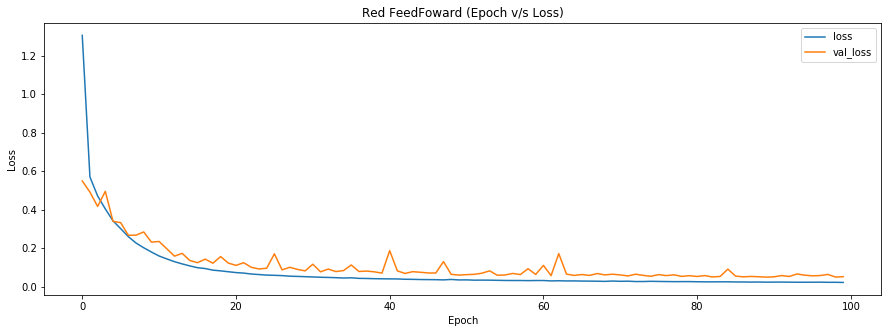

In [9]:
_ = pd.DataFrame(history.history).plot(figsize=(15, 5), title='Red FeedFoward (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

La red sobreajusta, ya que el error de entrenamiento disminuye, mientras que el de validación se mantiene constante. Es interesante observar que el error de validación presenta saltos, mostrando que el error de entrenamiento no siempre está ligado al error de generalización.

> c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).  

In [10]:
# import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.DEBUG)

In [11]:
_, history_relu = build_and_train_ann(hidden_activation=activations.relu, epochs=250)

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
   32/11369 [..............................] - ETA: 32s - loss: 136.6190Batch 4: Invalid loss, terminating training


/home/cserpell/git/inf477/tarea1/p3/lib/python3.5/site-packages/keras/utils/generic_utils.py:338: RuntimeWarning: invalid value encountered in multiply
  self._values[k][0] += v * (current - self._seen_so_far)
/home/cserpell/git/inf477/tarea1/p3/lib/python3.5/site-packages/keras/utils/generic_utils.py:338: RuntimeWarning: invalid value encountered in double_scalars
  self._values[k][0] += v * (current - self._seen_so_far)


Text(0, 0.5, 'Loss')

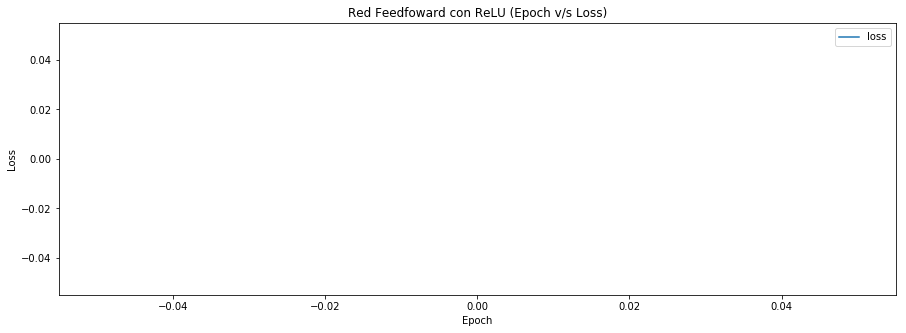

In [12]:
_ = pd.DataFrame(history_relu.history).plot(figsize=(15,5), title='Red Feedfoward con ReLU (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Si no cambiamos ningún otro parámetro más que la función de activación, el algoritmo diverge. Esto ocurre pues como el gradiente de ReLU es siempre constante igual a 0 o a 1, los pesos pueden crecer rápidamente, y la función de pérdida dar `nan`.

> d) Repita b) y c) variando la tasa de aprendizaje (*learning rate*) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [13]:
import numpy as np

In [14]:
histories_sigmoid = {}
histories_relu = {}

for learning_rate in np.logspace(-10, 0, num=5):
    print('Current learning rate: {}'.format(learning_rate))
    _, history_sigmoid = build_and_train_ann(learning_rate=learning_rate)
    _, history_relu = build_and_train_ann(learning_rate=learning_rate, hidden_activation=activations.relu)
    
    try:
        histories_sigmoid.update({
            'loss-lr: {0}'.format(learning_rate): history_sigmoid.history['loss'],
            'val_loss-lr: {0}'.format(learning_rate): history_sigmoid.history['val_loss']
        })

        histories_relu.update({
            'loss-lr: {0}'.format(learning_rate): history_relu.history['loss'],
            'val_loss-lr: {0}'.format(learning_rate): history_relu.history['val_loss']
        })
    except KeyError:
        continue

Current learning rate: 1e-10
Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 1s 69us/step - loss: 144.2641 - val_loss: 179.0877
Epoch 2/100
11369/11369 [==============================] - 1s 60us/step - loss: 144.2631 - val_loss: 179.0865
Epoch 3/100
11369/11369 [==============================] - 1s 60us/step - loss: 144.2620 - val_loss: 179.0853
Epoch 4/100
11369/11369 [==============================] - 1s 59us/step - loss: 144.2609 - val_loss: 179.0840
Epoch 5/100
11369/11369 [==============================] - 1s 60us/step - loss: 144.2599 - val_loss: 179.0828
Epoch 6/100
11369/11369 [==============================] - 1s 59us/step - loss: 144.2588 - val_loss: 179.0816
Epoch 7/100
11369/11369 [==============================] - 1s 60us/step - loss: 144.2577 - val_loss: 179.0804
Epoch 8/100
11369/11369 [==============================] - 1s 61us/step - loss: 144.2567 - val_loss: 179.0792
Epoch 9/100
11369/11369 [=================

Text(0, 0.5, 'Loss')

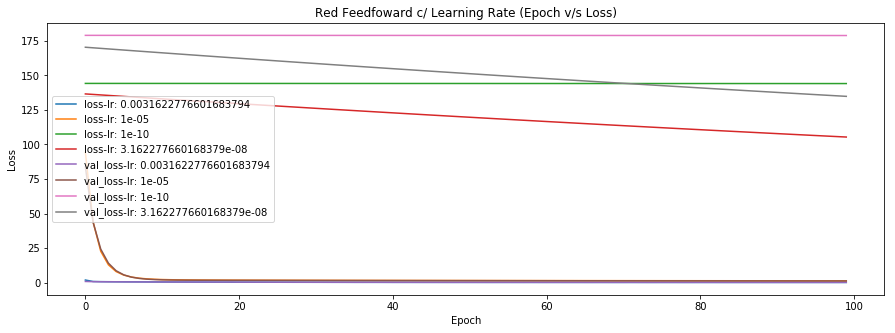

In [15]:
_ = pd.DataFrame(histories_sigmoid).plot(figsize=(15, 5), title='Red Feedfoward c/ Learning Rate (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Text(0, 0.5, 'Loss')

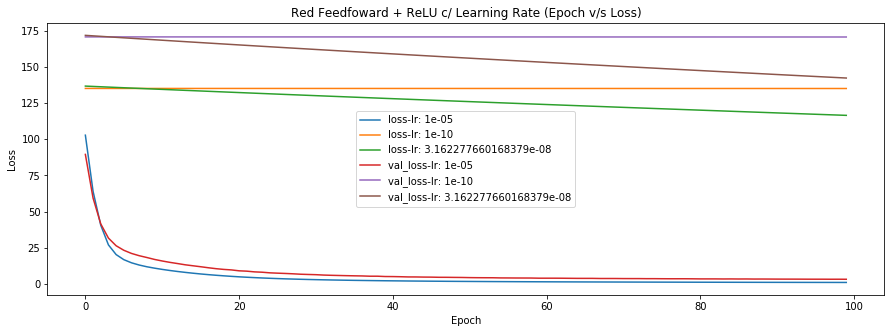

In [16]:
_ = pd.DataFrame(histories_relu).plot(figsize=(15, 5), title='Red Feedfoward + ReLU c/ Learning Rate (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Obviamente, cuando learning rate es muy pequeño, el error prácticamente no disminuye, resultando inútil para el aprendizaje. En el caso de los valores grandes, diverge, y para los valores pequeños, el error va disminuyendo, como esperábamos. A partir del último gráfico, vemos que en el caso de activación ReLU, la tasa $1\times 10^{-5}$ resulta en el mejor comportamiento, y usaremos esa a partir de ahora.

> e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.

In [17]:
histories_sigmoid = {}
histories_relu = {}

for decay in np.logspace(-6, 0, num=5):
    _, history_sigmoid = build_and_train_ann(decay=decay)
    _, history_relu = build_and_train_ann(decay=decay, hidden_activation=activations.relu)

    try:
        histories_sigmoid.update({
            'loss-decay {0:.4f}'.format(decay): history_sigmoid.history['loss'],
            'val_loss-decay {0:.4f}'.format(decay): history_sigmoid.history['val_loss']
        })
        histories_relu.update({
            'loss-decay {0:.4f}'.format(decay): history_relu.history['loss'],
            'val_loss-decay {0:.4f}'.format(decay): history_relu.history['val_loss']
        })
    except KeyError:
        continue

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 1s 85us/step - loss: 1.3652 - val_loss: 0.5559
Epoch 2/100
11369/11369 [==============================] - 1s 62us/step - loss: 0.5597 - val_loss: 0.4470
Epoch 3/100
11369/11369 [==============================] - 1s 62us/step - loss: 0.4586 - val_loss: 0.3890
Epoch 4/100
11369/11369 [==============================] - 1s 63us/step - loss: 0.3883 - val_loss: 0.4238
Epoch 5/100
11369/11369 [==============================] - 1s 62us/step - loss: 0.3351 - val_loss: 0.3284
Epoch 6/100
11369/11369 [==============================] - 1s 63us/step - loss: 0.2880 - val_loss: 0.2917
Epoch 7/100
11369/11369 [==============================] - 1s 62us/step - loss: 0.2516 - val_loss: 0.3122
Epoch 8/100
11369/11369 [==============================] - 1s 62us/step - loss: 0.2202 - val_loss: 0.2504
Epoch 9/100
11369/11369 [==============================] - 1s 64us/step - loss: 0.1943 - val_loss: 0.28

Text(0, 0.5, 'Loss')

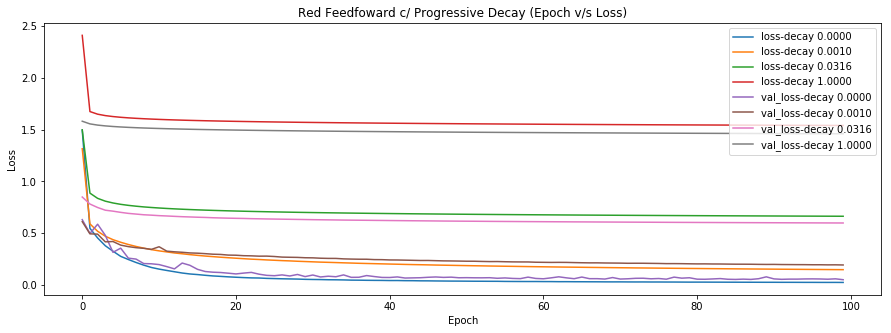

In [18]:
_ = pd.DataFrame(histories_sigmoid).plot(figsize=(15, 5), title='Red Feedfoward c/ Progressive Decay (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Text(0, 0.5, 'Loss')

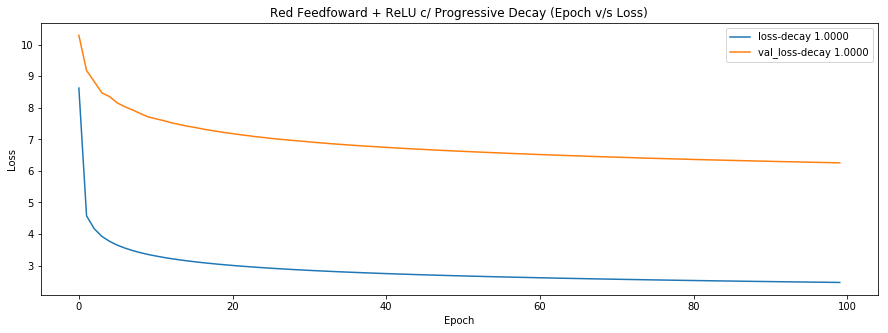

In [19]:
_ = pd.DataFrame(histories_relu).plot(figsize=(15, 5), title='Red Feedfoward + ReLU c/ Progressive Decay (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Al usar progressive decay, lo que ocurre es que el algoritmo actualiza los pesos al inicio, cambiando el valor del error rápidamente, pero después ya no logra cambios grandes en el error, debido a que el algoritmo da pasos cada vez más pequeños. En el caso de activación sigmoidal, el mejor comportamiento se obtuvo sin progressive decay, y en el caso de ReLU, lamentablemente divirgió para cualquier valor que no fuese 1, pues no se usó el learning rate adecuado en esta parte de la pregunta. Debido a esto, no usaremos progressive decay de ahora en adelante.

> f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente.

In [20]:
batch_sizes = np.round(np.linspace(1, X_train_scaled.shape[0], 3))
histories_sigmoid = {}
histories_relu = {}

for batch_size in batch_sizes:
    batch_size = int(batch_size)
    _, history_sigmoid = build_and_train_ann(batch_size=batch_size)
    _, history_relu = build_and_train_ann(batch_size=batch_size, hidden_activation=activations.relu, learning_rate=1e-5)
    try:
        histories_sigmoid.update({
            'loss-bs: {0}'.format(batch_size): history_sigmoid.history['loss'],
            'val_loss-bs: {0}'.format(batch_size): history_sigmoid.history['val_loss']
        })
        t_loss = history_relu.history['loss']
        val_loss = history_relu.history['val_loss']
        if len(t_loss) < EPOCHS:
            t_loss += [np.inf] * (EPOCHS - len(t_loss))
        if len(val_loss) < EPOCHS:
            val_loss += [np.inf] * (EPOCHS - len(val_loss))
        histories_relu.update({
            'loss-bs: {0}'.format(batch_size): t_loss,
            'val_loss-bs: {0}'.format(batch_size): val_loss
        })
    except KeyError:
        continue

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
  416/11369 [>.............................] - ETA: 16s - loss: 1248256049298128271079624006434816.0000Batch 454: Invalid loss, terminating training
Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 14s 1ms/step - loss: 15.3103 - val_loss: 7.4881
Epoch 2/100
11369/11369 [==============================] - 15s 1ms/step - loss: 2.2858 - val_loss: 4.4616
Epoch 3/100
11369/11369 [==============================] - 16s 1ms/step - loss: 1.3115 - val_loss: 3.6514
Epoch 4/100
11369/11369 [==============================] - 16s 1ms/step - loss: 0.9831 - val_loss: 3.3836
Epoch 5/100
11369/11369 [==============================] - 16s 1ms/step - loss: 0.8148 - val_loss: 3.3231
Epoch 6/100
11369/11369 [==============================] - 16s 1ms/step - loss: 0.7156 - val_loss: 2.9669
Epoch 7/100
11369/11369 [==============================] - 16s 1ms/step - loss: 0.6338 - val_loss: 2.889

Text(0, 0.5, 'Loss')

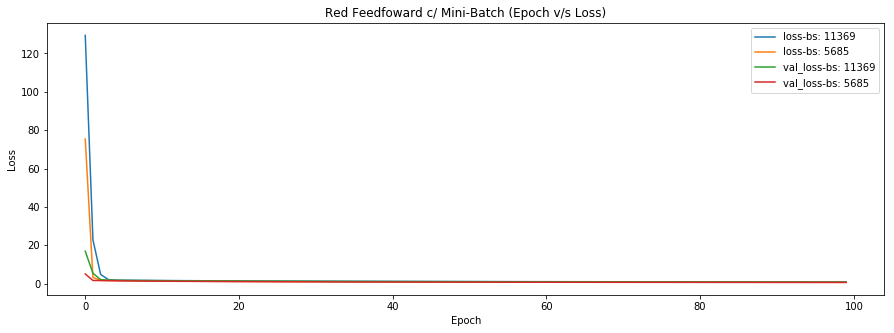

In [21]:
_ = pd.DataFrame(histories_sigmoid).plot(figsize=(15, 5), title='Red Feedfoward c/ Mini-Batch (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Text(0, 0.5, 'Loss')

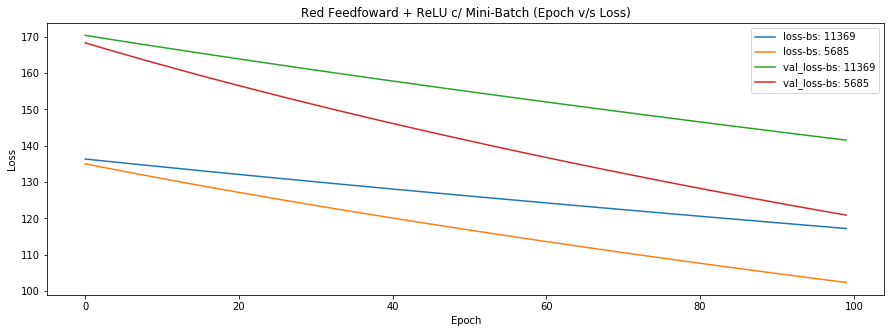

In [22]:
_ = pd.DataFrame(histories_relu).plot(figsize=(15, 5), title='Red Feedfoward + ReLU c/ Mini-Batch (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Vemos que al usar un batch size mayor, el error disminuye más lento. Esto puede deberse a la estocasticidad del cálculo del gradiente cuando el tamaño del batch es menor. Al ser la elección de las pequeñas muestras aleatorias, el algoritmo debe explorar regiones que no lo fuerzan a seguir el gradiente exacto. La ejecución demora mucho más, pues tiene que tomar la mayor parte del conjunto de entrenamiento para hacerlo.

> g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de validación?

In [23]:
histories_sigmoid = {}
histories_relu = {}

for optimizer in [optimizers.SGD, optimizers.Adam, optimizers.RMSprop,
                  optimizers.Adagrad, optimizers.Adadelta]:

    _, history_sigmoid = build_and_train_ann(optimizer=optimizer)
    _, history_relu = build_and_train_ann(optimizer=optimizer, hidden_activation=activations.relu, learning_rate=1e-5)
    try:
        histories_sigmoid.update({
            'loss-opti:{0}'.format(optimizer.__name__): history_sigmoid.history['loss'],
            'val_loss-opti:{0}'.format(optimizer.__name__): history_sigmoid.history['val_loss']
        })
        t_loss = history_relu.history['loss']
        val_loss = history_relu.history['val_loss']
        if len(t_loss) < EPOCHS:
            t_loss += [np.inf] * (EPOCHS - len(t_loss))
        if len(val_loss) < EPOCHS:
            val_loss += [np.inf] * (EPOCHS - len(val_loss))
        histories_relu.update({
            'loss-opti: {0}'.format(optimizer.__name__): t_loss,
            'val_loss-opti: {0}'.format(optimizer.__name__): val_loss
        })
    except KeyError:
        continue

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 1s 107us/step - loss: 1.2206 - val_loss: 0.5392
Epoch 2/100
11369/11369 [==============================] - 1s 67us/step - loss: 0.5627 - val_loss: 0.4581
Epoch 3/100
11369/11369 [==============================] - 1s 67us/step - loss: 0.4631 - val_loss: 0.4233
Epoch 4/100
11369/11369 [==============================] - 1s 67us/step - loss: 0.3901 - val_loss: 0.3848
Epoch 5/100
11369/11369 [==============================] - 1s 65us/step - loss: 0.3327 - val_loss: 0.4117
Epoch 6/100
11369/11369 [==============================] - 1s 66us/step - loss: 0.2868 - val_loss: 0.2776
Epoch 7/100
11369/11369 [==============================] - 1s 65us/step - loss: 0.2529 - val_loss: 0.3189
Epoch 8/100
11369/11369 [==============================] - 1s 64us/step - loss: 0.2244 - val_loss: 0.2893
Epoch 9/100
11369/11369 [==============================] - 1s 65us/step - loss: 0.2031 - val_loss: 0.3

Text(0, 0.5, 'Loss')

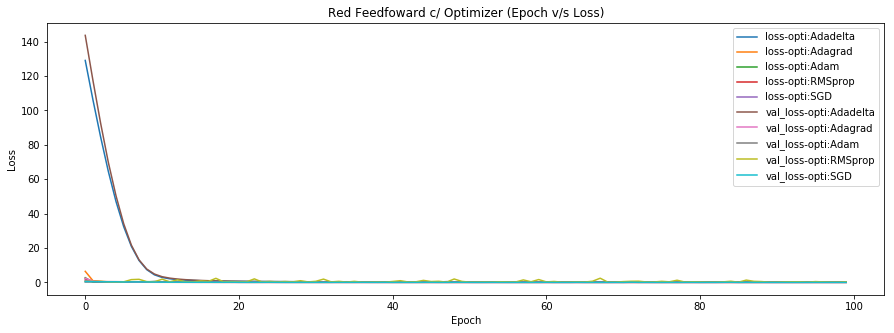

In [24]:
_ = pd.DataFrame(histories_sigmoid).plot(figsize=(15, 5), title='Red Feedfoward c/ Optimizer (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Text(0, 0.5, 'Loss')

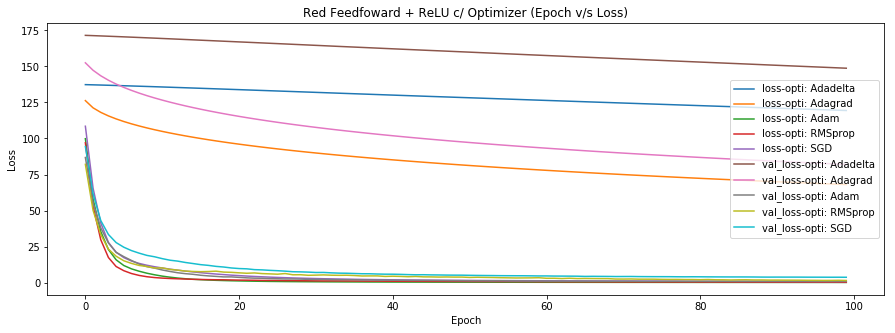

In [25]:
_ = pd.DataFrame(histories_relu).plot(figsize=(15, 5), title='Red Feedfoward + ReLU c/ Optimizer (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Vemos que el optimizador Adadelta y Adagrad convergen mucho más lento, no obteniendo buenos resultados hasta muy avanzada la simulación, en el caso de activación sigmoidal, y nunca para ReLU. Vemos que los algoritmos Adam y RMSprop convergen más rápido. Esto está de acuerdo con lo que se reporta en muchos lugares, donde ya se da por hecho que usar ellos son una buena opción.

> h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente.

In [26]:
_ = pd.DataFrame(histories_sigmoid).plot(figsize=(15,5), title='Red Feedfoward c/ Mini-Batch (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

In [27]:
histories_sigmoid = {}
histories_relu = {}

for regularizer_kind in [regularizers.l1, regularizers.l2, regularizers.l1_l2]:
    for regularizer_param in np.linspace(0.0, 1.0, num=3):
        _, history_sigmoid = build_and_train_ann(regularizer_kind=regularizer_kind, regularizer_param=regularizer_param)
        _, history_relu = build_and_train_ann(regularizer_kind=regularizer_kind,
                                              regularizer_param=regularizer_param,
                                              hidden_activation=activations.relu, learning_rate=1e-5)
        try:
            histories_sigmoid.update({
                'loss-{0}:{1:.4f}'.format(regularizer_kind.__name__, regularizer_param): history_sigmoid.history['loss'],
                'val_loss-{0}:{1:.4f}'.format(regularizer_kind.__name__, regularizer_param): history_sigmoid.history['val_loss']
            })
            histories_relu.update({
                'loss-{0}:{1:.4f}'.format(regularizer_kind.__name__, regularizer_param): history_relu.history['loss'],
                'val_loss-{0}:{1:.4f}'.format(regularizer_kind.__name__, regularizer_param): history_relu.history['val_loss']
            })
        except KeyError:
            continue

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 1s 109us/step - loss: 1.3256 - val_loss: 0.5588
Epoch 2/100
11369/11369 [==============================] - 1s 64us/step - loss: 0.5676 - val_loss: 0.4622
Epoch 3/100
11369/11369 [==============================] - 1s 63us/step - loss: 0.4680 - val_loss: 0.6535
Epoch 4/100
11369/11369 [==============================] - 1s 63us/step - loss: 0.4040 - val_loss: 0.3862
Epoch 5/100
11369/11369 [==============================] - 1s 65us/step - loss: 0.3383 - val_loss: 0.3278
Epoch 6/100
11369/11369 [==============================] - 1s 63us/step - loss: 0.2913 - val_loss: 0.3491
Epoch 7/100
11369/11369 [==============================] - 1s 62us/step - loss: 0.2568 - val_loss: 0.2597
Epoch 8/100
11369/11369 [==============================] - 1s 66us/step - loss: 0.2254 - val_loss: 0.2593
Epoch 9/100
11369/11369 [==============================] - 1s 60us/step - loss: 0.1991 - val_loss: 0.3

Text(0, 0.5, 'Loss')

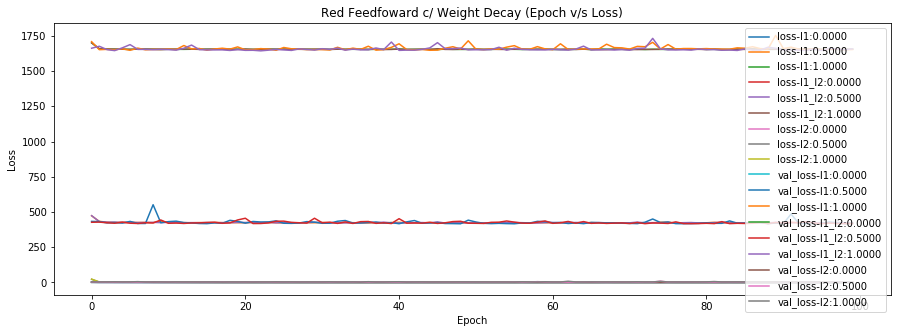

In [28]:
_ = pd.DataFrame(histories_sigmoid).plot(figsize=(15,5), title='Red Feedfoward c/ Weight Decay (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Text(0, 0.5, 'Loss')

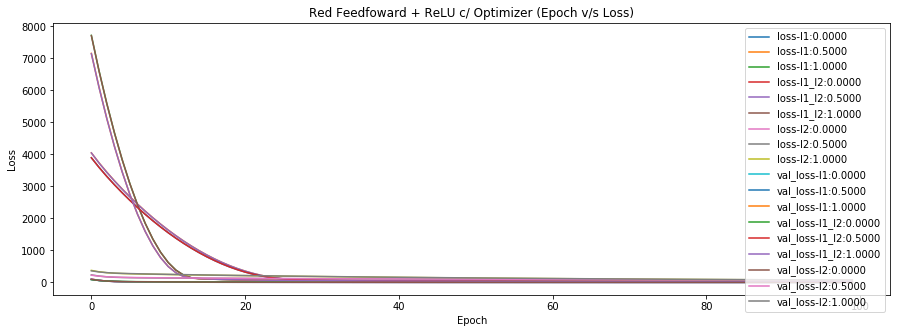

In [29]:
_ = pd.DataFrame(histories_relu).plot(figsize=(15,5), title='Red Feedfoward + ReLU c/ Optimizer (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Vemos que la regularización cambia grandemente el comportamiento de la optimziación. En el caso de activación sigmoidal, el algoritmo converge a ciertos niveles de error, de los cuales no es capaz de salir. Significa que llega a óptimos locales sin poder explorar más el espacio para un mínimo global. En el caso de ReLU, la elección del valor cambia el comportamiento inicial, pero no el error a largo plazo. Podemos decir que la elección del mejor valor es bastante empírica, necesitando recorrer valores para determinar el mejor valor después de muchos epochs.

> i) Entrene los modelos obtenidos en b) y c) utilizando *Dropout*. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.

In [30]:
histories_sigmoid = {}
histories_relu = {}

for dropout_rate in np.linspace(0.0, 1.0, 3):
    _, history_sigmoid = build_and_train_ann(dropout_rate=dropout_rate)
    _, history_relu = build_and_train_ann(dropout_rate=dropout_rate, hidden_activation=activations.relu,
                                          learning_rate=1e-5)
    histories_sigmoid.update({
        'loss-drop: {0:.4f}'.format(dropout_rate): history_sigmoid.history['loss'],
        'val_loss-drop: {0:.4f}'.format(dropout_rate): history_sigmoid.history['val_loss']
    })
    histories_relu.update({
        'loss-drop: {0:.4f}'.format(dropout_rate): history_relu.history['loss'],
        'val_loss-drop: {0:.4f}'.format(dropout_rate): history_relu.history['val_loss']
    })

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 2s 146us/step - loss: 1.2163 - val_loss: 0.5365
Epoch 2/100
11369/11369 [==============================] - 1s 70us/step - loss: 0.5610 - val_loss: 0.5060
Epoch 3/100
11369/11369 [==============================] - 1s 70us/step - loss: 0.4559 - val_loss: 0.5160
Epoch 4/100
11369/11369 [==============================] - 1s 63us/step - loss: 0.3754 - val_loss: 0.3469
Epoch 5/100
11369/11369 [==============================] - 1s 65us/step - loss: 0.3203 - val_loss: 0.3043
Epoch 6/100
11369/11369 [==============================] - 1s 63us/step - loss: 0.2774 - val_loss: 0.2885
Epoch 7/100
11369/11369 [==============================] - 1s 62us/step - loss: 0.2420 - val_loss: 0.3442
Epoch 8/100
11369/11369 [==============================] - 1s 64us/step - loss: 0.2126 - val_loss: 0.2858
Epoch 9/100
11369/11369 [==============================] - 1s 64us/step - loss: 0.1891 - val_loss: 0.2

Text(0, 0.5, 'Loss')

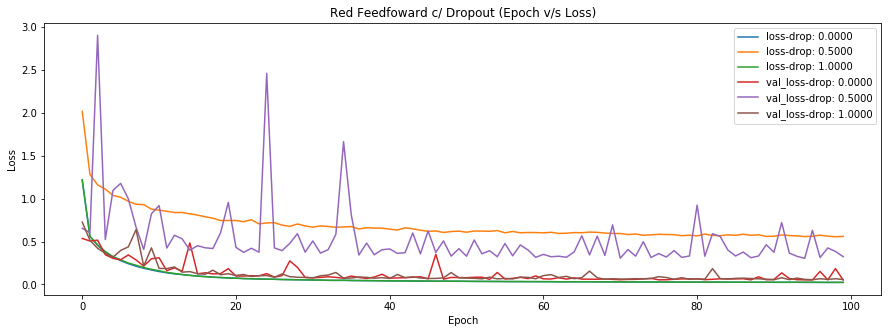

In [31]:
_ = pd.DataFrame(histories_sigmoid).plot(figsize=(15, 5), title='Red Feedfoward c/ Dropout (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Text(0, 0.5, 'Loss')

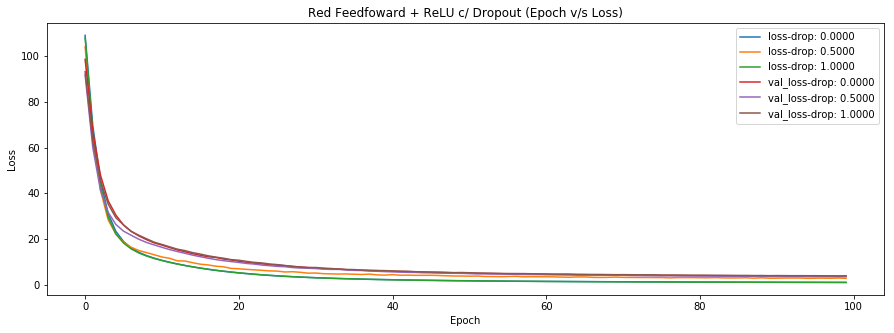

In [32]:
_ = pd.DataFrame(histories_relu).plot(figsize=(15, 5), title='Red Feedfoward + ReLU c/ Dropout (Epoch v/s Loss)')
_.set_xlabel("Epoch")
_.set_ylabel("Loss")

Vemos que utilizar dropout mejora el desempeño de las redes con activación ReLU, pero para activación sigmoidal no es tan claro. Para sigmoidal, el uso de 0.5 empeoró los resultados. Esto ocurre debido a que dropout actua como regularizador, cambiando el comportamiento a diferentes datos.

> j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de *folds* igual a *K* = 5 y *K*=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [33]:
from sklearn.model_selection import KFold

In [34]:
Xm = X_train_scaled.values
ym = y_train

In [35]:
def do_crossvalidation(k=5, params=None):
    cvscores = []
    kfold = KFold(n_splits=k)
    for train, val in kfold.split(Xm):
        # TODO: Use new data instead of global data to train model
        params.update({'X_train_scaled': Xm[train], 'y_train': ym[train]})
        model, history_sigmoid = build_and_train_ann(**params)
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    return mse_cv

In [36]:
histories_sigmoid = {}
histories_relu = {}
for dropout_rate in np.linspace(0, 1.0, num=3):
    params = {'dropout_rate': dropout_rate}
    mse_sig  = do_crossvalidation(k=5, params=params)
    params.update({'hidden_activation': activations.relu, 'learning_rate': 1e-5})
    mse_relu = do_crossvalidation(k=5, params=params)
    histories_sigmoid.update({'mse_sig-drop: {0:.4f}'.format(dropout_rate): mse_sig})
    histories_relu.update({'mse_relu-drop: {0:.4f}'.format(dropout_rate): mse_relu})

Train on 9095 samples, validate on 2436 samples
Epoch 1/100
9095/9095 [==============================] - 1s 159us/step - loss: 1.6034 - val_loss: 3.6837
Epoch 2/100
9095/9095 [==============================] - 0s 52us/step - loss: 0.6411 - val_loss: 0.5489
Epoch 3/100
9095/9095 [==============================] - 0s 50us/step - loss: 0.5225 - val_loss: 0.4107
Epoch 4/100
9095/9095 [==============================] - 0s 50us/step - loss: 0.4526 - val_loss: 0.4289
Epoch 5/100
9095/9095 [==============================] - 0s 52us/step - loss: 0.3873 - val_loss: 0.8146
Epoch 6/100
9095/9095 [==============================] - 0s 48us/step - loss: 0.3383 - val_loss: 0.3201
Epoch 7/100
9095/9095 [==============================] - 0s 47us/step - loss: 0.2924 - val_loss: 0.7476
Epoch 8/100
9095/9095 [==============================] - 0s 45us/step - loss: 0.2611 - val_loss: 0.3446
Epoch 9/100
9095/9095 [==============================] - 0s 48us/step - loss: 0.2349 - val_loss: 0.2647
Epoch 10/100
90

In [37]:
print(histories_sigmoid)
print(min(histories_sigmoid, key=histories_sigmoid.get))
print(histories_relu)
print(min(histories_relu, key=histories_relu.get))

{'mse_sig-drop: 0.5000': 0.32854376309847033, 'mse_sig-drop: 0.0000': 0.042268546269861436, 'mse_sig-drop: 1.0000': 0.06810500321351506}
mse_sig-drop: 0.0000
{'mse_relu-drop: 0.5000': 1.9241688436318825, 'mse_relu-drop: 0.0000': 1.763242750572695, 'mse_relu-drop: 1.0000': 1.7647542035550607}
mse_relu-drop: 0.0000


Los últimos resultados indican entonces que lo mejor es no usar dropout, según 5-fold.

In [38]:
histories_sigmoid = {}
histories_relu = {}
for dropout_rate in [0.0, 0.2]:
    params = {'dropout_rate': dropout_rate}
    mse_sig  = do_crossvalidation(k=10, params=params)
    params.update({'hidden_activation': activations.relu, 'learning_rate': 1e-5})
    mse_relu = do_crossvalidation(k=10, params=params)
    histories_sigmoid.update({'mse_sig-drop: {0:.4f}'.format(dropout_rate): mse_sig})
    histories_relu.update({'mse_relu-drop: {0:.4f}'.format(dropout_rate): mse_relu})

Train on 10232 samples, validate on 2436 samples
Epoch 1/100
10232/10232 [==============================] - 2s 190us/step - loss: 1.3326 - val_loss: 0.5849
Epoch 2/100
10232/10232 [==============================] - 1s 61us/step - loss: 0.5935 - val_loss: 0.4925
Epoch 3/100
10232/10232 [==============================] - 1s 61us/step - loss: 0.4909 - val_loss: 0.4164
Epoch 4/100
10232/10232 [==============================] - 1s 62us/step - loss: 0.4228 - val_loss: 0.3734
Epoch 5/100
10232/10232 [==============================] - 1s 62us/step - loss: 0.3565 - val_loss: 0.3377
Epoch 6/100
10232/10232 [==============================] - 1s 63us/step - loss: 0.3110 - val_loss: 0.3190
Epoch 7/100
10232/10232 [==============================] - 1s 61us/step - loss: 0.2665 - val_loss: 0.2698
Epoch 8/100
10232/10232 [==============================] - 1s 61us/step - loss: 0.2375 - val_loss: 0.2499
Epoch 9/100
10232/10232 [==============================] - 1s 64us/step - loss: 0.2127 - val_loss: 0.2

In [39]:
print(histories_sigmoid)
print(min(histories_sigmoid, key=histories_sigmoid.get))
print(histories_relu)
print(min(histories_relu, key=histories_relu.get))

{'mse_sig-drop: 0.2000': 0.1715513223185504, 'mse_sig-drop: 0.0000': 0.03824225330912391}
mse_sig-drop: 0.0000
{'mse_relu-drop: 0.0000': 1.2887504792842366, 'mse_relu-drop: 0.2000': 1.3271058736229442}
mse_relu-drop: 0.0000


Con 10-fold, confirmamos lo que habíamos visto con 5-fold, pero el tiempo utilizado fue el doble, pues se realizaron 10 repeticiones en vez de 5. Usar 10-fold nos entrega mayor seguridad en la decisión.

Ahora que elegimos el mejor modelo, lo evaluaremos finalmente en nuestro conjunto de test.

In [40]:
dropout_rate = 0.0
model, history = build_and_train_ann(dropout_rate=dropout_rate)
scores = model.evaluate(X_test_scaled, y_test)

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 3s 252us/step - loss: 1.3208 - val_loss: 0.6326
Epoch 2/100
11369/11369 [==============================] - 1s 83us/step - loss: 0.5630 - val_loss: 0.5209
Epoch 3/100
11369/11369 [==============================] - 1s 83us/step - loss: 0.4609 - val_loss: 0.5520
Epoch 4/100
11369/11369 [==============================] - 1s 83us/step - loss: 0.3865 - val_loss: 0.3475
Epoch 5/100
11369/11369 [==============================] - 1s 83us/step - loss: 0.3273 - val_loss: 0.3061
Epoch 6/100
11369/11369 [==============================] - 1s 83us/step - loss: 0.2866 - val_loss: 0.3035
Epoch 7/100
11369/11369 [==============================] - 1s 82us/step - loss: 0.2470 - val_loss: 0.3157
Epoch 8/100
11369/11369 [==============================] - 1s 83us/step - loss: 0.2170 - val_loss: 0.2249
Epoch 9/100
11369/11369 [==============================] - 1s 83us/step - loss: 0.1881 - val_loss: 0.2

In [41]:
print(scores)

0.07891385311048463


Ese es nuestro score de test.

<a id="segundo"></a>
## 2. Deep Networks
Las *deep network*, o lo que hoy en día se conoce como *deep learning*, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).  
Este tipo de redes neuronales tienen una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes *feed forward*, siendo bastante dificiles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?  

<img src="http://neuralnetworksanddeeplearning.com/images/tikz36.png" title="Title text" width="80%" height="20%" />



En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el *backpropagation* hacia las primeras capas de la red. 

> a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de validación y pruebas.

In [42]:
import pandas as pd

In [43]:
total = len(datos)
total_train = int(0.7 * total)
total_valid = int(0.15 * total)
total_test = total - total_train - total_valid
# Nota: Se esta usando siempre la misma division, podria ser aleatoria
df_train = datos[:total_train]  # 70% de los datos
df_val = datos[total_train:(total_train + total_valid)]  # 15% de los datos
df_test = datos[total_valid:]  # 15% restante

In [44]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val), columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
# Transformamos la salida a un vector de una dimension
y_train = df_train.pop('Eat').values.reshape(-1, 1)
y_val = df_val.pop('Eat').values.reshape(-1, 1)
y_test = df_test.pop('Eat').values.reshape(-1, 1)
# Los datos de entrada se separan de la salida
X_train_scaled.drop(columns=['Eat'], axis=1, inplace=True)
X_val_scaled.drop(columns=['Eat'], axis=1, inplace=True)
X_test_scaled.drop(columns=['Eat'], axis=1, inplace=True)

> b) Para el mismo problema definido anteriormente ([sección 1](#primero)) se entrenarán diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (*loss*) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de *gradients* (__[link](https://www.tensorflow.org/api_docs/python/tf/keras/backend/gradients)__) en el *backend* de Keras. Deberá generar un **histograma** para todos los pesos de cada capa antes y despues del entrenamiento con 250 *epochs*. Comente.

In [45]:
from keras import activations
from keras import backend
from keras import layers
from keras import losses
from keras import models
from keras import optimizers
from matplotlib import pyplot
import numpy as np
import pandas as pd
import tensorflow as tf

In [46]:
def graph_gradients(model):
    loss = losses.mean_squared_error(model.output, y_train)
    listOfVariableTensors = model.trainable_weights 
    gradients = backend.gradients(loss, listOfVariableTensors)  # We can now calculate the gradients.
    sess = backend.get_session()
    evaluated_gradients = sess.run(gradients, feed_dict={model.input: X_train_scaled.values})
    evaluated_gradients = [gradient / len(y_train) for gradient in evaluated_gradients]
    for number, one_gradients in enumerate(evaluated_gradients):
        print(model.trainable_weights[number].name)
        pd.Series(one_gradients.flatten()).hist()
        pyplot.show()

In [47]:
model = models.Sequential()
model.add(layers.Dense(256, input_dim=X_train_scaled.shape[1],
                       kernel_initializer='uniform',
                       activation=activations.sigmoid))
model.add(layers.Dense(1, kernel_initializer='uniform',
                       activation=activations.linear))
model.compile(optimizer=optimizers.SGD(lr=0.01), loss=losses.mean_squared_error)

Veamos los gradientes antes de entrenar:

dense_267/kernel:0


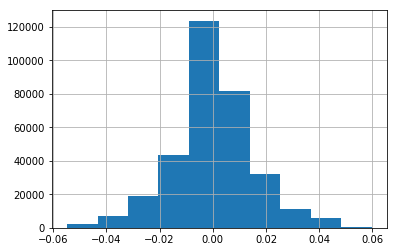

dense_267/bias:0


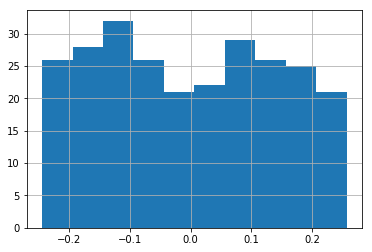

dense_268/kernel:0


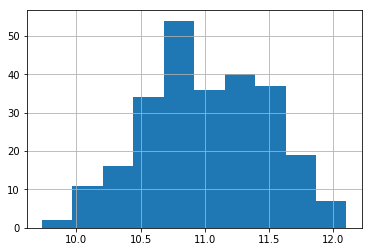

dense_268/bias:0


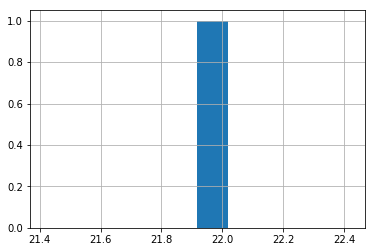

In [48]:
graph_gradients(model)

Vemos que los gradientes de los pesos y sesgos de la capa de entrada se distribuyen con media 0, mientras que en la siguiente capa están centrados en 11. En la capa de salida, el gradiente es alto pues es una función de activación lineal. Los gradientes de los pesos tienen una distribución relativamente normal, mientras que los sesgos parece ser más uniforme.

In [49]:
model.fit(X_train_scaled, y_train, epochs=EPOCHS, verbose=1, batch_size=32,
          validation_data=(X_val_scaled, y_val))

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 3s 262us/step - loss: 1.3346 - val_loss: 0.8117
Epoch 2/100
11369/11369 [==============================] - 1s 91us/step - loss: 0.5691 - val_loss: 0.4791
Epoch 3/100
11369/11369 [==============================] - 1s 93us/step - loss: 0.4670 - val_loss: 0.9626
Epoch 4/100
11369/11369 [==============================] - 1s 95us/step - loss: 0.3881 - val_loss: 0.3794
Epoch 5/100
11369/11369 [==============================] - 1s 95us/step - loss: 0.3259 - val_loss: 0.3317
Epoch 6/100
11369/11369 [==============================] - 1s 95us/step - loss: 0.2872 - val_loss: 0.3118
Epoch 7/100
11369/11369 [==============================] - 1s 94us/step - loss: 0.2476 - val_loss: 0.3033
Epoch 8/100
11369/11369 [==============================] - 1s 91us/step - loss: 0.2177 - val_loss: 0.3427
Epoch 9/100
11369/11369 [==============================] - 1s 91us/step - loss: 0.1919 - val_loss: 0.2

dense_267/kernel:0


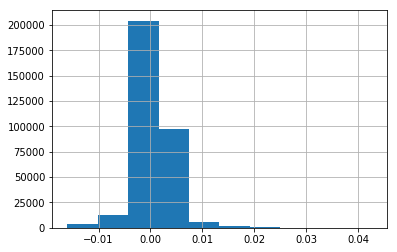

dense_267/bias:0


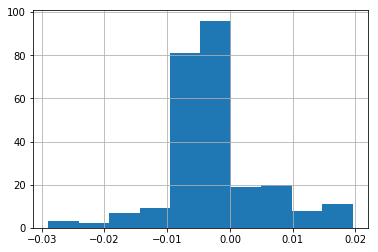

dense_268/kernel:0


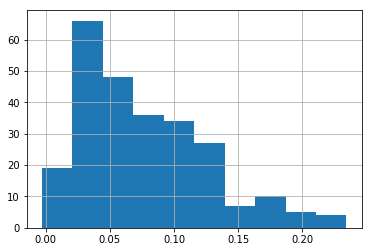

dense_268/bias:0


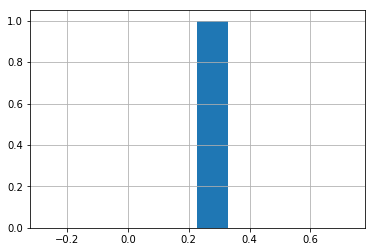

In [50]:
graph_gradients(model)

Vemos que los gradientes de los sesgos de la capa oculta se distribuyen más cercanos a la media, y los de los pesos de la capa de salida ya no son tan gaussianos.

> c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho más profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar.

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 3s 282us/step - loss: 14.2598 - val_loss: 15.0183
Epoch 2/100
11369/11369 [==============================] - 1s 107us/step - loss: 13.7265 - val_loss: 15.5732
Epoch 3/100
11369/11369 [==============================] - 1s 108us/step - loss: 13.6661 - val_loss: 14.7677
Epoch 4/100
11369/11369 [==============================] - 1s 109us/step - loss: 13.2877 - val_loss: 17.7870
Epoch 5/100
11369/11369 [==============================] - 1s 108us/step - loss: 3.1482 - val_loss: 1.0330
Epoch 6/100
11369/11369 [==============================] - 1s 108us/step - loss: 0.8433 - val_loss: 0.6107
Epoch 7/100
11369/11369 [==============================] - 1s 107us/step - loss: 0.6926 - val_loss: 1.2462
Epoch 8/100
11369/11369 [==============================] - 1s 108us/step - loss: 0.6308 - val_loss: 0.6351
Epoch 9/100
11369/11369 [==============================] - 1s 108us/step - loss: 0.5728

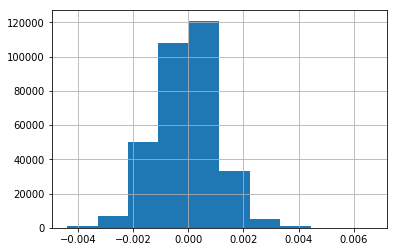

dense_269/bias:0


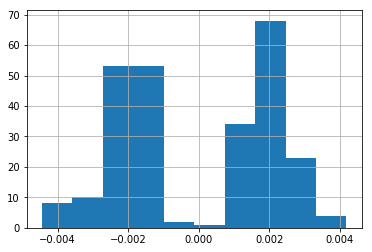

dense_270/kernel:0


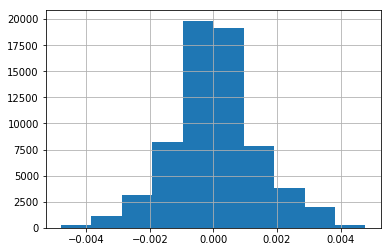

dense_270/bias:0


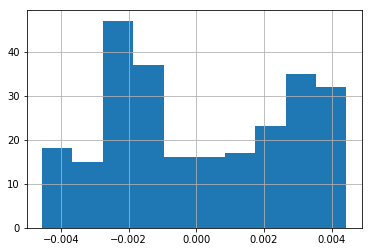

dense_271/kernel:0


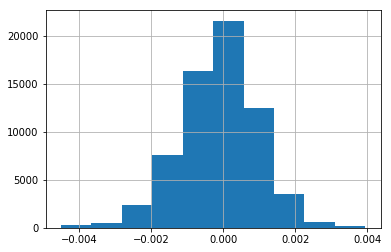

dense_271/bias:0


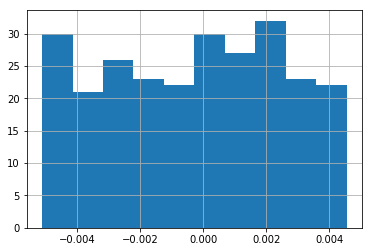

dense_272/kernel:0


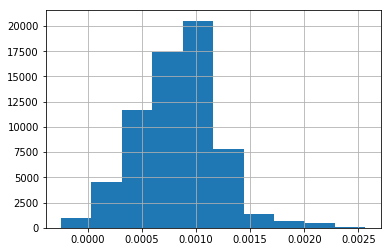

dense_272/bias:0


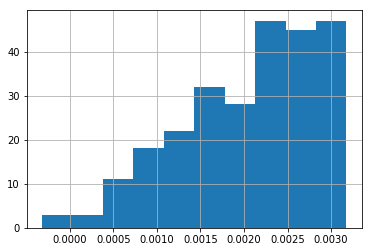

dense_273/kernel:0


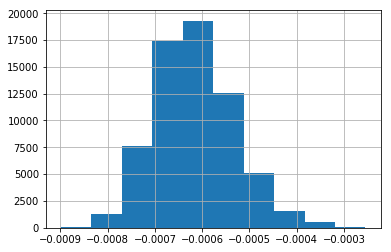

dense_273/bias:0


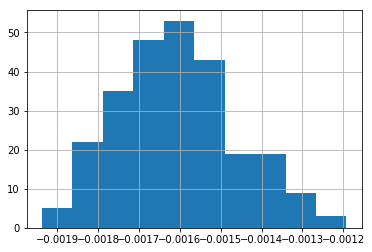

dense_274/kernel:0


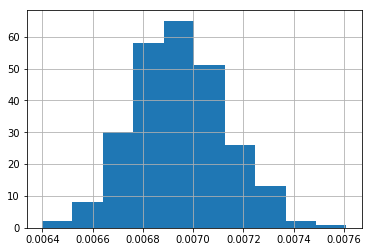

dense_274/bias:0


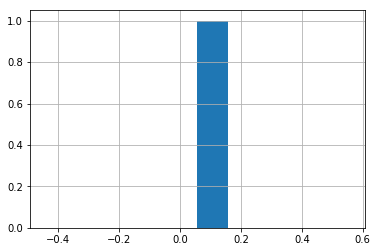

In [51]:
model = models.Sequential()
model.add(layers.Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', activation='sigmoid'))
model.add(layers.Dense(256, kernel_initializer='uniform', activation='sigmoid'))
model.add(layers.Dense(256, kernel_initializer='uniform', activation='sigmoid'))
model.add(layers.Dense(256, kernel_initializer='uniform', activation='sigmoid'))
model.add(layers.Dense(256, kernel_initializer='uniform', activation='sigmoid'))
model.add(layers.Dense(1, kernel_initializer='uniform', activation='linear'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=EPOCHS, verbose=1, batch_size=32,
          validation_data=(X_val_scaled, y_val))
graph_gradients(model)

Los gradientes de los pesos de las capas ocultas se distribuyen en distribuciones que algo parecen normales, aunque no lo son exactamente. Vemos que los gradientes de las capas más cercanas a la salida son mayores, mientras que los da las capas más lejos de la salida, y más cerca de la entrada son menores. Esto muestra el problema del gradiente desvaneciente en las capas de la entrada. Los gradientes de los sesgos son menos gaussianos, mostrando incluso a veces mezcla de varias medias.


> d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [[1]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar.

In [52]:
model = models.Sequential()
model.add(layers.Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform', activation='sigmoid'))
model.add(layers.Dense(256, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.add(layers.Dense(256, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.add(layers.Dense(256, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.add(layers.Dense(256, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.add(layers.Dense(1, kernel_initializer='glorot_uniform', activation='linear'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=EPOCHS, verbose=1, batch_size=32,
          validation_data=(X_val_scaled, y_val))

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 3s 291us/step - loss: 14.0921 - val_loss: 10.8053
Epoch 2/100
11369/11369 [==============================] - 1s 109us/step - loss: 2.8858 - val_loss: 2.1295
Epoch 3/100
11369/11369 [==============================] - 1s 108us/step - loss: 1.3664 - val_loss: 3.0671
Epoch 4/100
11369/11369 [==============================] - 1s 108us/step - loss: 0.9737 - val_loss: 0.8004
Epoch 5/100
11369/11369 [==============================] - 1s 108us/step - loss: 0.8131 - val_loss: 0.4552
Epoch 6/100
11369/11369 [==============================] - 1s 109us/step - loss: 0.6354 - val_loss: 0.3843
Epoch 7/100
11369/11369 [==============================] - 1s 109us/step - loss: 0.5414 - val_loss: 0.3775
Epoch 8/100
11369/11369 [==============================] - 1s 112us/step - loss: 0.5041 - val_loss: 0.4086
Epoch 9/100
11369/11369 [==============================] - 1s 113us/step - loss: 0.4263 - val

dense_275/kernel:0


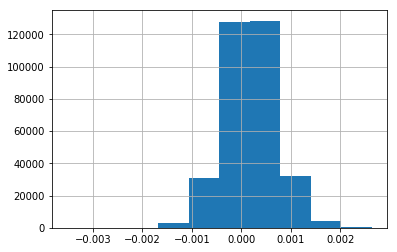

dense_275/bias:0


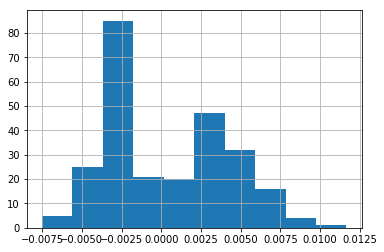

dense_276/kernel:0


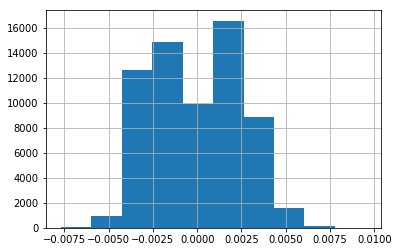

dense_276/bias:0


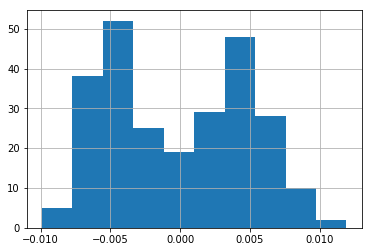

dense_277/kernel:0


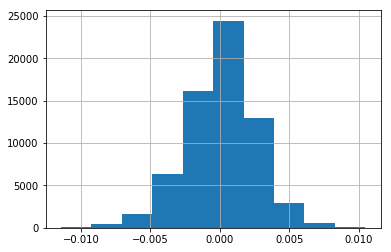

dense_277/bias:0


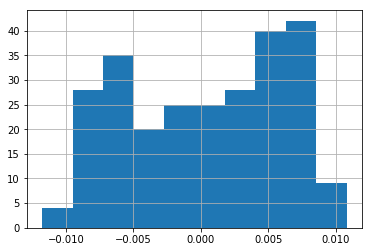

dense_278/kernel:0


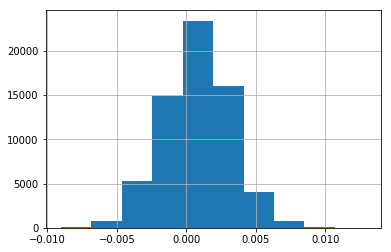

dense_278/bias:0


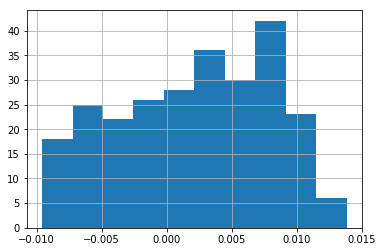

dense_279/kernel:0


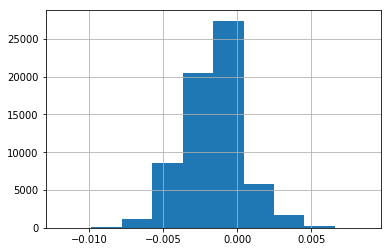

dense_279/bias:0


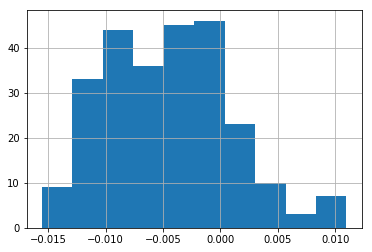

dense_280/kernel:0


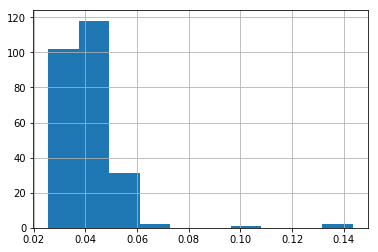

dense_280/bias:0


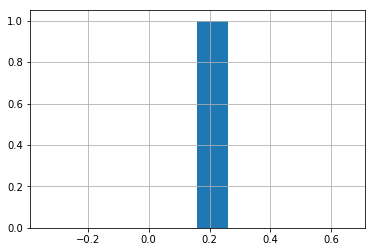

In [53]:
graph_gradients(model)

No vemos un cambio radical cambiando la inicialización, aunque el problema del gradiente desvaneciente en este caso se notó con más fuerza, teniendo gradientes menores para las primeras capas, más cercanas a la entrada.

> e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform* y comparar con la inicialización de He [[2]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 3s 293us/step - loss: 24.8734 - val_loss: 3.4312
Epoch 2/100
11369/11369 [==============================] - 1s 110us/step - loss: 1.3442 - val_loss: 3.8606
Epoch 3/100
11369/11369 [==============================] - 1s 110us/step - loss: 0.5392 - val_loss: 0.9676
Epoch 4/100
11369/11369 [==============================] - 1s 111us/step - loss: 0.3729 - val_loss: 1.0136
Epoch 5/100
11369/11369 [==============================] - 1s 109us/step - loss: 0.2528 - val_loss: 0.9002
Epoch 6/100
11369/11369 [==============================] - 1s 111us/step - loss: 0.2222 - val_loss: 0.7216
Epoch 7/100
11369/11369 [==============================] - 1s 114us/step - loss: 0.1916 - val_loss: 0.6439
Epoch 8/100
11369/11369 [==============================] - 1s 114us/step - loss: 0.1700 - val_loss: 0.5890
Epoch 9/100
11369/11369 [==============================] - 1s 114us/step - loss: 0.1609 - val_

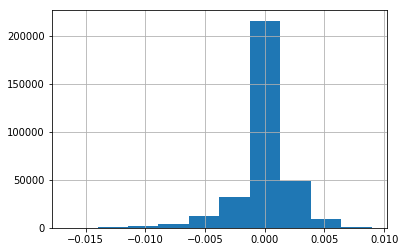

dense_281/bias:0


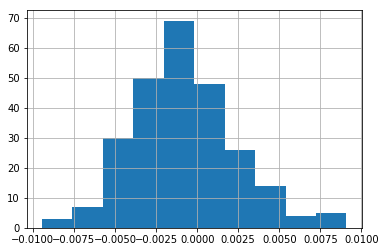

dense_282/kernel:0


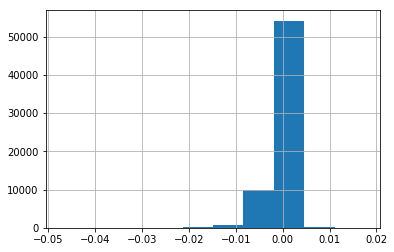

dense_282/bias:0


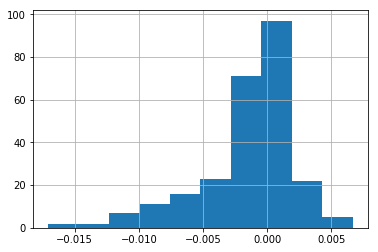

dense_283/kernel:0


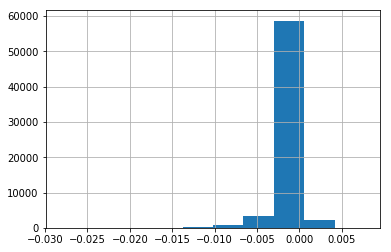

dense_283/bias:0


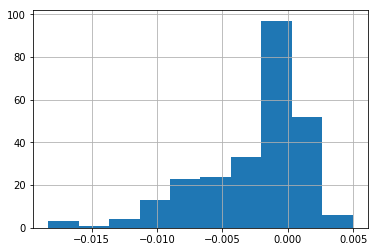

dense_284/kernel:0


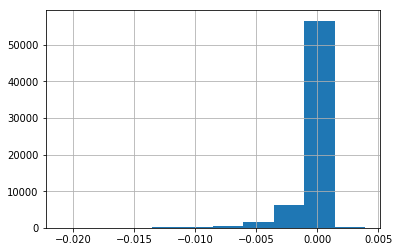

dense_284/bias:0


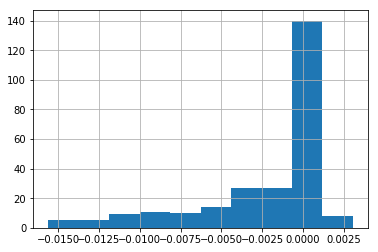

dense_285/kernel:0


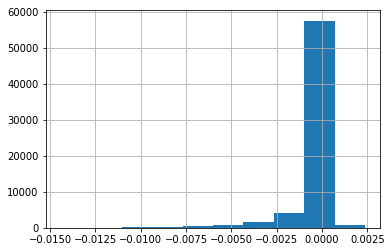

dense_285/bias:0


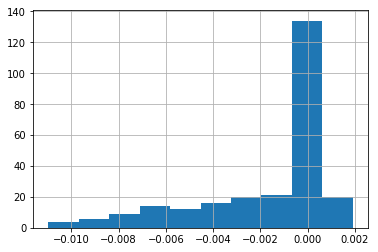

dense_286/kernel:0


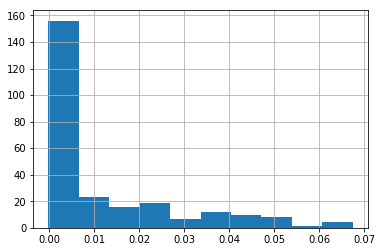

dense_286/bias:0


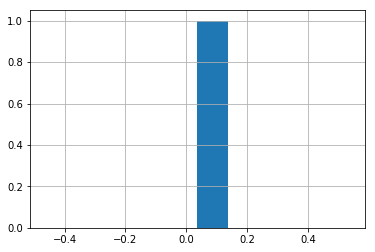

In [54]:
model = models.Sequential()
model.add(layers.Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(256, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(256, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(256, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(256, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='uniform', activation='linear'))
sgd = optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=EPOCHS, verbose=1, batch_size=32,
          validation_data=(X_val_scaled, y_val))
graph_gradients(model)

Vemos que los gradientes con activación ReLU se comportan de manera totalmente diferente, ya que o bien la mayoría son 0 (ya que no se activa la unidad), o valores inclinados hacia un lado (positivo o negativo), lo cual tiene sentido dependiendo de si la activación es positiva o negativa.

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 3s 291us/step - loss: 7.7044 - val_loss: 6.0937
Epoch 2/100
11369/11369 [==============================] - 1s 110us/step - loss: 2.9445 - val_loss: 6.2401
Epoch 3/100
11369/11369 [==============================] - 1s 111us/step - loss: 2.0420 - val_loss: 5.4250
Epoch 4/100
11369/11369 [==============================] - 1s 111us/step - loss: 1.0403 - val_loss: 2.3489
Epoch 5/100
11369/11369 [==============================] - 1s 110us/step - loss: 0.5825 - val_loss: 1.6375
Epoch 6/100
11369/11369 [==============================] - 1s 111us/step - loss: 0.4399 - val_loss: 1.8343
Epoch 7/100
11369/11369 [==============================] - 1s 110us/step - loss: 0.3823 - val_loss: 1.5364
Epoch 8/100
11369/11369 [==============================] - 1s 110us/step - loss: 0.2543 - val_loss: 2.2212
Epoch 9/100
11369/11369 [==============================] - 1s 112us/step - loss: 0.2151 - val_l

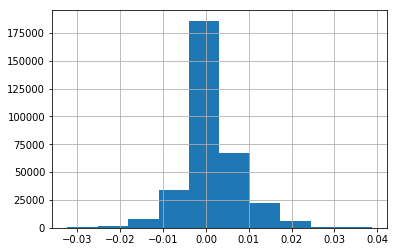

dense_287/bias:0


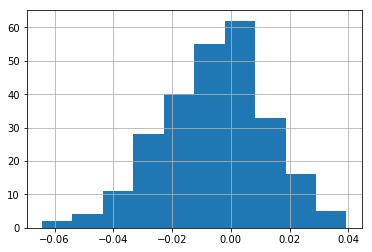

dense_288/kernel:0


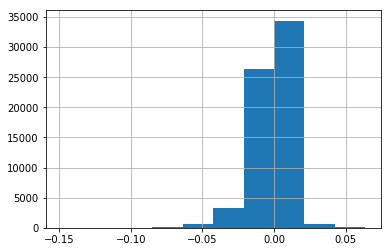

dense_288/bias:0


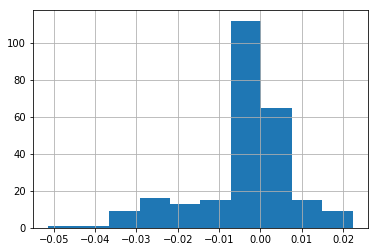

dense_289/kernel:0


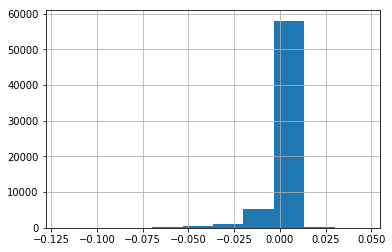

dense_289/bias:0


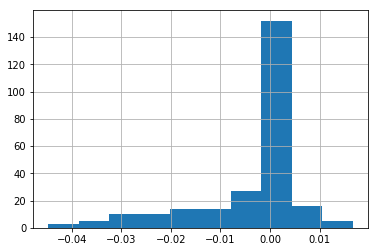

dense_290/kernel:0


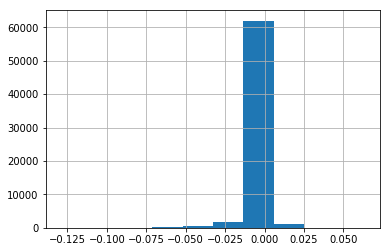

dense_290/bias:0


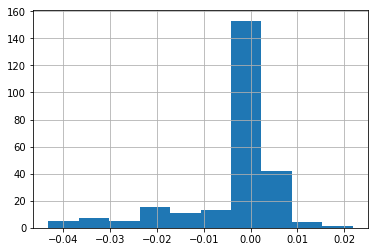

dense_291/kernel:0


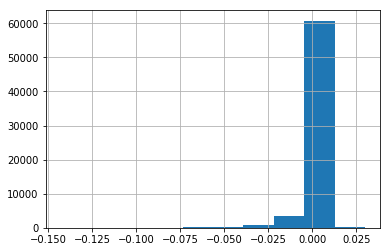

dense_291/bias:0


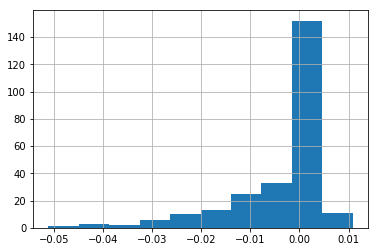

dense_292/kernel:0


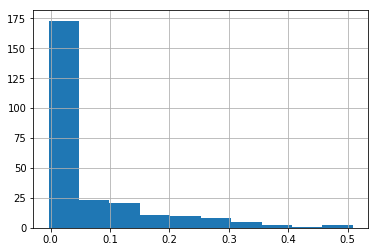

dense_292/bias:0


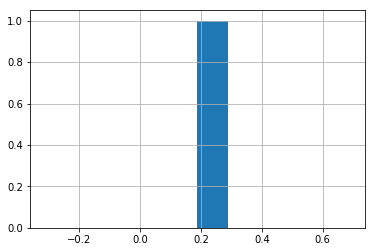

In [55]:
model = models.Sequential()
model.add(layers.Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(256, kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(256, kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(256, kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(256, kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='he_uniform', activation='linear'))
sgd = optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=EPOCHS, verbose=1, batch_size=32,
          validation_data=(X_val_scaled, y_val))
graph_gradients(model)

Al cambiar la inicialización, la red vuelve a tomar gradientes del error parecidos en el largo plazo.

> f) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, *momentum*, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (*mse*) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.

> g) Experimente con la utilización de una función activación auxiliar (debido a que aproxima) a '**ReLU**' y que es continua derivable (**softplus**) ¿Cuál es el beneficio de ésta con respecto ReLU? Comente.

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 3s 300us/step - loss: 4.9947 - val_loss: 0.6168
Epoch 2/100
11369/11369 [==============================] - 1s 111us/step - loss: 0.6129 - val_loss: 0.5995
Epoch 3/100
11369/11369 [==============================] - 1s 111us/step - loss: 0.3264 - val_loss: 0.4464
Epoch 4/100
11369/11369 [==============================] - 1s 113us/step - loss: 0.2876 - val_loss: 0.2970
Epoch 5/100
11369/11369 [==============================] - 1s 111us/step - loss: 0.2963 - val_loss: 0.3236
Epoch 6/100
11369/11369 [==============================] - 1s 112us/step - loss: 0.2106 - val_loss: 0.2622
Epoch 7/100
11369/11369 [==============================] - 1s 112us/step - loss: 0.1981 - val_loss: 0.2612
Epoch 8/100
11369/11369 [==============================] - 1s 111us/step - loss: 0.1572 - val_loss: 0.2058
Epoch 9/100
11369/11369 [==============================] - 1s 111us/step - loss: 0.1407 - val_l

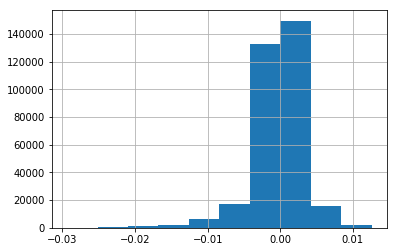

dense_293/bias:0


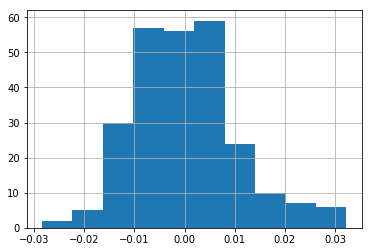

dense_294/kernel:0


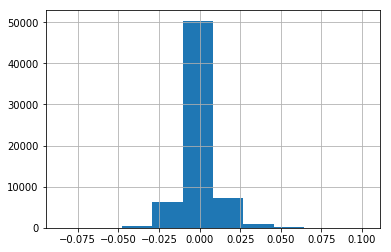

dense_294/bias:0


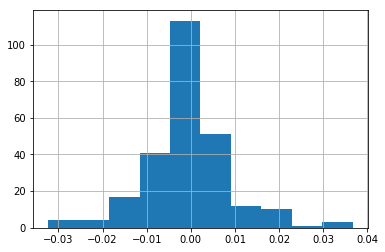

dense_295/kernel:0


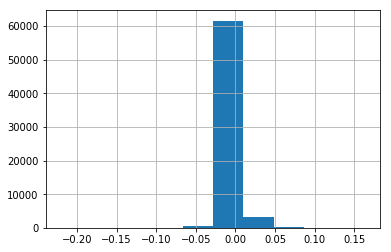

dense_295/bias:0


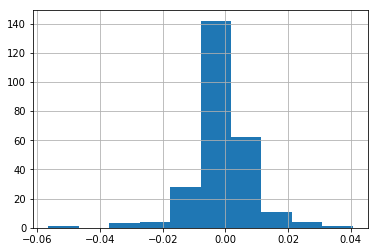

dense_296/kernel:0


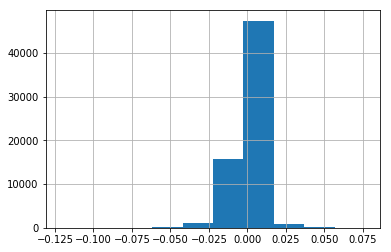

dense_296/bias:0


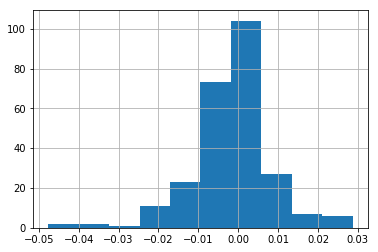

dense_297/kernel:0


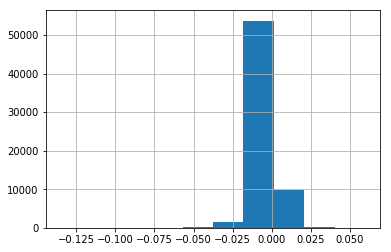

dense_297/bias:0


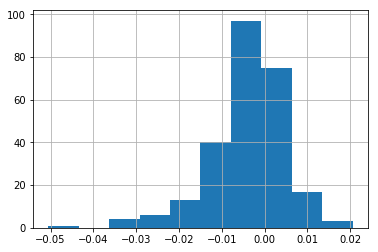

dense_298/kernel:0


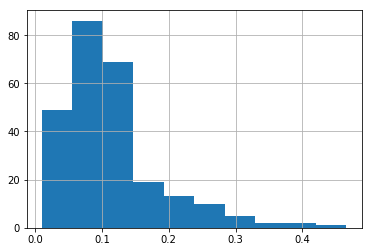

dense_298/bias:0


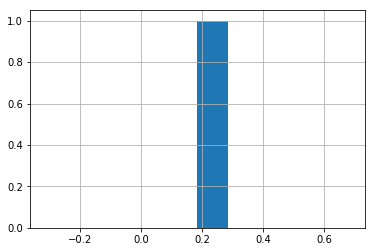

In [56]:
model = models.Sequential()
model.add(layers.Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform', activation='softplus'))
model.add(layers.Dense(256, kernel_initializer='he_uniform', activation='softplus'))
model.add(layers.Dense(256, kernel_initializer='he_uniform', activation='softplus'))
model.add(layers.Dense(256, kernel_initializer='he_uniform', activation='softplus'))
model.add(layers.Dense(256, kernel_initializer='he_uniform', activation='softplus'))
model.add(layers.Dense(1, kernel_initializer='he_uniform', activation='linear'))
sgd = optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=EPOCHS, verbose=1, batch_size=32,
          validation_data=(X_val_scaled, y_val))
graph_gradients(model)

En este caso vemos que los gradientes son mejor comportados, sin estar tan agrupados tanto en un solo valor. Sin embargo, vemos que el error de validación no alcanza un valor tan bajo como con la activación ReLU. Esto puede deberse a la forma de activación dispersa (sparse) que solo las ReLU permiten, con los ceros reales.

> h) Pruebe con utilizar una red *shallow* (poco profunda), es decir, sitúe todas las neuronas en una única capa ¿Qué sucede con la convergencia del algoritmo? ¿Por qué sucede este fenómeno?

Train on 11369 samples, validate on 2436 samples
Epoch 1/100
11369/11369 [==============================] - 3s 293us/step - loss: 1.9679 - val_loss: 0.9180
Epoch 2/100
11369/11369 [==============================] - 1s 103us/step - loss: 0.8566 - val_loss: 0.6974
Epoch 3/100
11369/11369 [==============================] - 1s 103us/step - loss: 0.7164 - val_loss: 0.6234
Epoch 4/100
11369/11369 [==============================] - 1s 103us/step - loss: 0.6467 - val_loss: 0.5612
Epoch 5/100
11369/11369 [==============================] - 1s 103us/step - loss: 0.6045 - val_loss: 0.5443
Epoch 6/100
11369/11369 [==============================] - 1s 103us/step - loss: 0.5704 - val_loss: 0.5163
Epoch 7/100
11369/11369 [==============================] - 1s 104us/step - loss: 0.5426 - val_loss: 0.4861
Epoch 8/100
11369/11369 [==============================] - 1s 103us/step - loss: 0.5185 - val_loss: 0.4770
Epoch 9/100
11369/11369 [==============================] - 1s 103us/step - loss: 0.4989 - val_l

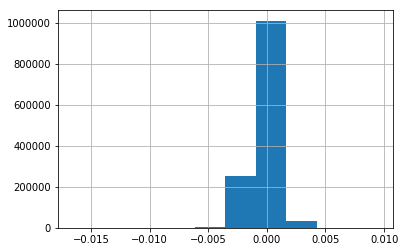

dense_299/bias:0


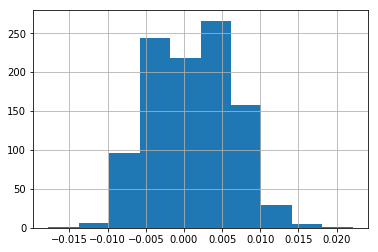

dense_300/kernel:0


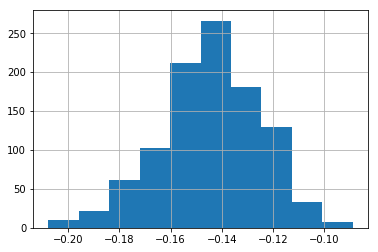

dense_300/bias:0


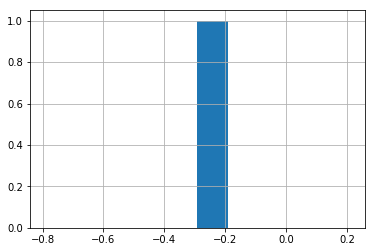

In [57]:
model = models.Sequential()
model.add(layers.Dense(1024, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform', activation='sigmoid'))
model.add(layers.Dense(1, kernel_initializer='he_uniform', activation='linear'))
sgd = optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mean_squared_error')
history = model.fit(X_train_scaled.values, y_train, epochs=EPOCHS, verbose=1,
                    validation_data=(X_val_scaled.values, y_val))
graph_gradients(model)

En el caso de la red shallow, vemos que la convergencia fue mucho más lenta, aunque de todas maneras se obtuvo valores de error razonablemente buenos. Hay que considerar que utilizamos más neuronas en la única capa oculta, sabiendo que esto permitiría continuar teniendo un error pequeño. Los gradientes obtenidos en la capa oculta muestran que se agrupan alrededor del cero como siempre, y que existen algunos pesos alejados de él.

Como conclusión a esta pregunta, vimos que los gradientes van acercándose a cero, debido a que al acercarse a un mínimo, aunque sea local, la función de error presenta gradientes menores. En una red profunda, esto es especialmente complicado debido al problema del gradiente desvaneciente, no llegando casi nada a las primeras capas. La activación ReLU o softplus permite disminuir ese problema. La distribución final de los gradientes deja de ser tan gaussiana en este caso.

<a id="tercero"></a>
## 3. Entendimiento de imágenes de personas

El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.


<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) con la tarea de predecir la **edad** (*target value*) de la persona en la imagen. Los datos con corresponden a 3640 imágenes de Flickr de rostros de personas, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de características extraídas. Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:

In [58]:
import numpy as np
from scipy import io as sio

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```

> a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

In [59]:
mat_train = sio.loadmat('AgeGenderClassification/eventrain.mat')
mat_test = sio.loadmat('AgeGenderClassification/eventest.mat')
data_train = mat_train['trcoll'][0][0]
data_test = mat_test['tecoll'][0][0]
train_shapes = [one.shape for one in data_train]
test_shapes = [one.shape for one in data_test]
print('TRAIN\n=====')
for number, one in enumerate(data_train):
    try:
        print('shape: {} -- min: {} -- max: {} -- mean: {}'.format(one.shape, np.min(one), np.max(one), np.mean(one)))
    except TypeError:
        print('shape: {} -- file name'.format(one.shape))
print('TEST\n====')
for number, one in enumerate(data_test):
    try:
        print('shape: {} -- min: {} -- max: {} -- mean: {}'.format(one.shape, np.min(one), np.max(one), np.mean(one)))
    except TypeError:
        print('shape: {} -- file name'.format(one.shape))

TRAIN
=====
shape: (3500, 14) -- min: -29.406301941201146 -- max: 97.0 -- mean: 7.414406546658688
shape: (3500, 1) -- min: 1 -- max: 75 -- mean: 26.571428571428573
shape: (3500, 1) -- min: 1 -- max: 2 -- mean: 1.5
shape: (3500, 37) -- min: -0.24667863552741254 -- max: 0.23390253076251002 -- mean: -0.001798466713554005
shape: (3500, 600) -- min: -8195.1083984375 -- max: 7143.4609375 -- mean: -15.902426719665527
shape: (3500, 2989) -- min: 0 -- max: 255 -- mean: 113.87388385986714
shape: (3500, 1) -- min: 0.009900990099009901 -- max: 0.9306930693069307 -- mean: 0.4880876944837341
shape: (3500, 1) -- min: 0.9808219178082191 -- max: 80.9041095890411 -- mean: 30.135350293542075
shape: (1, 3500) -- file name
shape: (3500, 7) -- min: 6.0 -- max: 992.0 -- mean: 295.09210205078125
shape: (3500, 2) -- min: 1 -- max: 5646 -- mean: 636.9377142857143
TEST
====
shape: (1050, 14) -- min: -26.859858116641078 -- max: 97.0 -- mean: 7.414501413324483
shape: (1050, 1) -- min: 1 -- max: 75 -- mean: 26.5714

Vemos que el conjunto de entrenamiento tiene 3500 datos, mientras que el de pruebas (test) tiene 1050.

> b) Eliga cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo neuronal denso. Además extraiga las etiquetas del problema. Describa los datos utilizados.

De manera de no usar el conjunto de pruebas (test) para definir la red, separaremos los datos de entrenamiento en dos conjuntos: validación (500 datos) y entrenamiento (3000). Lo hacemos de manera aleatoria, pues nos dimos cuenta que los datos tienen orden. Inicialmente los habíamos separado dejando los primeros 3000 en el de entrenamiento y el resto en validación, pero algunas edades quedaron sin representación en el conjunto de validación.

In [60]:
from sklearn import model_selection

ffcoefs_columns = ['ffcoefs_{}'.format(n) for n in range(train_shapes[3][1])]
faceGist_columns = ['faceGist_{}'.format(n) for n in range(train_shapes[4][1])]
fimg_columns = ['fimg_{}'.format(n) for n in range(train_shapes[5][1])]
genFeat_columns = ['genFeat_xcenter',  # (normalized from 0 to 100). Left to right image coord
            'genFeat_ycenter',  # (normalized from 0 to 100). top to bottom image coord
            'genFeat_minSpanningTreeDegree',
            'genFeat_SizeRelativeToNeighbor',  # >1 means face bigger than neighbor
            'genFeat_PosX',  #                     negative means neighbor to the right of face (in eye dist units)
            'genFeat_PosY',  #                     negative means Face below NN
            'genFeat_neiAngle',  #                 Angle of neighbor Face. Left eye at center, Cartesian coord system
            'genFeat_myAngle',  #                  angle of current Face
            'genFeat_SizeRelAverage',  # face size relative to the average
            'genFeat_x',
            'genFeat_y',  # position relative average. 
            'genFeat_Size',  # Relative to Planar FaceFit.
            'genFeat_NearestNeighborGender',  # (NOT USED IN CVPR 09)
            'genFeat_NearestNeighborAgebin']  # (NOT USED IN CVPR 09)
columns = (['TARGET'] +
           genFeat_columns +
           ['genClass'] +
           ffcoefs_columns +
           faceGist_columns +
           fimg_columns +
           ['facePosSize_leftEyeX',
            'facePosSize_leftEyeY',
            'facePosSize_rightEyeX',
            'facePosSize_rightEyeY',
            'facePosSize_Xcenter',
            'facePosSize_YCenter',
            'facePosSize_EyeDistance]'])
df_train = pd.DataFrame(np.concatenate([data_train[1], data_train[0], data_train[2], data_train[3], data_train[4], data_train[5], data_train[9]], axis=1), columns=columns)
df_test = pd.DataFrame(np.concatenate([data_test[1], data_test[0], data_test[2], data_test[3], data_test[4], data_test[5], data_test[9]], axis=1), columns=columns)
df_train, df_val = model_selection.train_test_split(df_train, test_size=1.0/7.0)
df_train

TARGET  genFeat_xcenter  genFeat_ycenter  genFeat_minSpanningTreeDegree  \
24      51.0             68.0             36.0                            1.0   
3121    10.0             51.0             51.0                            1.0   
2916     1.0             60.0             36.0                            2.0   
3300     1.0             70.0             41.0                            2.0   
2635    10.0             19.0             30.0                            1.0   
357     10.0             74.0             45.0                            2.0   
1019    28.0             78.0             49.0                            1.0   
1252    28.0              9.0             66.0                            1.0   
2714    16.0             73.0             31.0                            1.0   
377     51.0             34.0             55.0                            1.0   
664     28.0             76.0             44.0                            1.0   
549     75.0             66.0             47.0                            1.0   
2456    75.0             45.0             60.0                            2.0   
287     10.0             64.0             42.0                            3.0   
1033    51.0             58.0             26.0                            4.0   
1603    75.0             31.0             35.0                            3.0   
657     16.0             23.0             25.0                            1.0   
2527    10.0             21.0             63.0                            1.0   
2060     1.0             68.0             51.0                            2.0   
1481    51.0             38.0             25.0                            2.0   
3324     1.0             68.0             43.0                            1.0   
3241    10.0             33.0             31.0                            2.0   
1324    28.0             66.0             21.0                            2.0   
2404    10.0             23.0             16.0                            2.0   
379     51.0             62.0             52.0                            2.0   
3148    10.0             46.0             50.0                            2.0   
3448     1.0             44.0             25.0                            2.0   
1471    28.0             76.0             29.0                            2.0   
1610    75.0             47.0             20.0                            1.0   
1470    16.0             63.0             29.0                            2.0   
...      ...              ...              ...                            ...   
1436    51.0             29.0             21.0                            2.0   
653     10.0             39.0             38.0                            1.0   
289     16.0             74.0             33.0                            2.0   
3095    10.0             86.0             52.0                            2.0   
2594     1.0             35.0             65.0                            2.0   
1962    10.0             59.0             45.0                            1.0   
1785    16.0             35.0             18.0                            2.0   
79      75.0             42.0             35.0                            2.0   
857     51.0             11.0             18.0                            1.0   
2833    10.0             52.0             34.0                            2.0   
1375    28.0             70.0             30.0                            2.0   
1606    16.0             56.0             59.0                            2.0   
2147    16.0             54.0             14.0                            2.0   
594     28.0             28.0             25.0                            2.0   
1263    28.0             43.0             30.0                            3.0   
2618     1.0             54.0             40.0                            2.0   
2650     1.0             42.0             54.0                            2.0   
654      5.0             56.0        

Se agregaron todas las columnas en el data frame. Cuando entrenemos redes más abajo, le sacamos algunas columnas que resultan en un peor desempeño.

Veamos cómo se distribuyen las etiquetas.

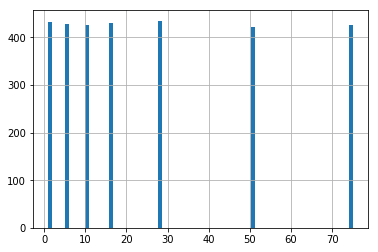

In [61]:
df_train['TARGET'].hist(bins=75)

Tenemos sólo 7 edades diferentes en las etiquetas.

Ahora construiremos un conjunto de entrenamiento, validación y pruebas, que mantendremos estandarizado.

In [62]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val), columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
# Transformamos la salida a un vector de una dimension
y_train = df_train.pop('TARGET').values.reshape(-1, 1)
y_val = df_val.pop('TARGET').values.reshape(-1, 1)
y_test = df_test.pop('TARGET').values.reshape(-1, 1)
# Los datos de entrada se separan de la salida
X_train_scaled.drop(columns=['TARGET'], axis=1, inplace=True)
X_val_scaled.drop(columns=['TARGET'], axis=1, inplace=True)
X_test_scaled.drop(columns=['TARGET'], axis=1, inplace=True)

> c) Defina y entrene una modelo de red neuronal *feed forward* para la inferencia de la edad de la persona a través de la representación escogida. Intente llegar a un *mse* menor a 100 en el conjunto de pruebas. Recuerde que **NO** puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.

*Nota: Puede notar que la cantidad de edades presentes en el problema son pocas (1,  5, 10, 16, 28, 51 o 75 años), por lo que puede tratar al problema así como de regresión o clasificación (considerando cada edad como una clase)*

#### Ayuda:
> Para problemas de clasificación de múltiples clases es necesario transformar las etiquetas categóricas en *one hot vector*, donde cada columna del vector representará una categoría. Por ejemplo, si existen tres categorías (perro, gato, ratón), la categoría perro puede ser codificada como [1,0,0], y la categoría ratón puede ser codificada como [0,0,1]. Para ésto la librería *keras* nos ayuda:

In [63]:
# from keras import utils

# y_onehot = utils.to_categorical(y_train, num_classes=edades_distintas)

Primero creamos una función utilitaria para probar diferentes configuraciones de red. Al ser un problema de regresión, la última capa tiene activación lineal. Además, la función de error es error cuadrático medio.

In [64]:
from keras import activations

In [65]:
def test_model(x_train, x_val, y_train, y_val,
               hidden_units=None, hidden_activation=None, epochs=20,
               learning_rate=0.01, regularizer_kind=None, regularizer_param=0.0,
               apply_sigmoid=-1):

    def correct_regularizer():
        if regularizer_kind:
            return regularizer_kind(regularizer_param)
        return None

    model = models.Sequential()
    if hidden_activation is None:
        hidden_activation = activations.sigmoid
    if hidden_units is None:
        hidden_units = [256, 256]
    for position, number_units in enumerate(hidden_units):
        current_activation = activations.sigmoid if position == apply_sigmoid else hidden_activation
        model.add(layers.Dense(number_units, input_dim=x_train.shape[1],
                               kernel_initializer='uniform',
                               kernel_regularizer=correct_regularizer(),
                               activation=hidden_activation))
    model.add(layers.Dense(1, kernel_initializer='uniform',
                           activation=activations.linear))
    model.compile(optimizer=optimizers.Adam(lr=learning_rate), loss=losses.mean_squared_error)
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1, batch_size=32,
                        validation_data=(x_val, y_val))
    return model, history

En cuanto al atributo género `genClass`, al tomar solo dos valores posibles, lo dejaremos como un atributo numérico. Al estandarizarlo, tomará un valor negativo para un género, y positivo para el otro. Si bien los valores no son -1 y 1 exactamente, basta para separar las dos clases, como vemos a continuación:

In [66]:
df_train['genClass'].describe()

count    3000.000000
mean        1.498000
std         0.500079
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: genClass, dtype: float64

In [67]:
X_train_scaled['genClass'].describe()

count    3.000000e+03
mean    -7.756758e-17
std      1.000167e+00
min     -9.960080e-01
25%     -9.960080e-01
50%     -9.960080e-01
75%      1.004008e+00
max      1.004008e+00
Name: genClass, dtype: float64

In [68]:
X_train_scaled['genClass'].unique()

array([ 1.00400803, -0.99600797])

Comenzamos entonces probando una red básica con 2 capas ocultas de 256 unidades cada una.

In [69]:
test_model(X_train_scaled, X_val_scaled, y_train, y_val)

Train on 3000 samples, validate on 500 samples
Epoch 1/20
3000/3000 [==============================] - 3s 876us/step - loss: 629.0130 - val_loss: 445.7531
Epoch 2/20
3000/3000 [==============================] - 0s 154us/step - loss: 409.2119 - val_loss: 411.2650
Epoch 3/20
3000/3000 [==============================] - 0s 152us/step - loss: 401.4326 - val_loss: 436.5976
Epoch 4/20
3000/3000 [==============================] - 0s 152us/step - loss: 366.4333 - val_loss: 415.6592
Epoch 5/20
3000/3000 [==============================] - 0s 151us/step - loss: 376.7104 - val_loss: 440.0022
Epoch 6/20
3000/3000 [==============================] - 0s 150us/step - loss: 369.9345 - val_loss: 411.9129
Epoch 7/20
3000/3000 [==============================] - 0s 154us/step - loss: 358.2268 - val_loss: 403.0299
Epoch 8/20
3000/3000 [==============================] - 0s 152us/step - loss: 348.1664 - val_loss: 425.1855
Epoch 9/20
3000/3000 [==============================] - 0s 152us/step - loss: 343.9606 - 

(<keras.engine.sequential.Sequential at 0x7f9f01705208>,
 <keras.callbacks.History at 0x7f9f006e1780>)

Ahora probaremos sacando la imagen original, ya que son muchas características, y usaremos solo las derivadas que nos entregan.

In [70]:
test_model(X_train_scaled.drop(columns=fimg_columns, axis=1),
           X_val_scaled.drop(columns=fimg_columns, axis=1),
           y_train, y_val)

Train on 3000 samples, validate on 500 samples
Epoch 1/20
3000/3000 [==============================] - 3s 842us/step - loss: 568.4186 - val_loss: 434.2855
Epoch 2/20
3000/3000 [==============================] - 0s 99us/step - loss: 382.4789 - val_loss: 368.4668
Epoch 3/20
3000/3000 [==============================] - 0s 94us/step - loss: 296.9839 - val_loss: 317.4008
Epoch 4/20
3000/3000 [==============================] - 0s 98us/step - loss: 239.5649 - val_loss: 280.2198
Epoch 5/20
3000/3000 [==============================] - 0s 96us/step - loss: 196.6798 - val_loss: 283.1084
Epoch 6/20
3000/3000 [==============================] - 0s 97us/step - loss: 161.8780 - val_loss: 279.2686
Epoch 7/20
3000/3000 [==============================] - 0s 96us/step - loss: 127.8898 - val_loss: 303.0936
Epoch 8/20
3000/3000 [==============================] - 0s 98us/step - loss: 105.9730 - val_loss: 276.4104
Epoch 9/20
3000/3000 [==============================] - 0s 97us/step - loss: 84.5751 - val_loss:

(<keras.engine.sequential.Sequential at 0x7f9efca88198>,
 <keras.callbacks.History at 0x7f9efca8d0f0>)

La red no mejoró su desempeño, y de hecho sobreajustó. Podemos ver que la función de pérdida de entrenamiento bajó mucho, sin que ocurriera lo mismo con la de validación. Probaremos disminuyendo la cantidad de neuronas en cada capa, pero aumentando en una capa.

In [71]:
test_model(X_train_scaled.drop(columns=fimg_columns, axis=1),
           X_val_scaled.drop(columns=fimg_columns, axis=1),
           y_train, y_val, hidden_units=[50, 50, 50])

Train on 3000 samples, validate on 500 samples
Epoch 1/20
3000/3000 [==============================] - 3s 874us/step - loss: 781.9076 - val_loss: 611.6736
Epoch 2/20
3000/3000 [==============================] - 0s 105us/step - loss: 498.7780 - val_loss: 417.9431
Epoch 3/20
3000/3000 [==============================] - 0s 106us/step - loss: 377.4747 - val_loss: 343.4458
Epoch 4/20
3000/3000 [==============================] - 0s 107us/step - loss: 337.8396 - val_loss: 364.5652
Epoch 5/20
3000/3000 [==============================] - 0s 104us/step - loss: 304.4677 - val_loss: 320.9483
Epoch 6/20
3000/3000 [==============================] - 0s 107us/step - loss: 273.0845 - val_loss: 313.0596
Epoch 7/20
3000/3000 [==============================] - 0s 108us/step - loss: 243.0156 - val_loss: 315.0224
Epoch 8/20
3000/3000 [==============================] - 0s 105us/step - loss: 227.6496 - val_loss: 311.4294
Epoch 9/20
3000/3000 [==============================] - 0s 104us/step - loss: 203.0087 - 

(<keras.engine.sequential.Sequential at 0x7f9efca8f550>,
 <keras.callbacks.History at 0x7f9efe3e10b8>)

Ocurrió lo mismo (sobreajuste). Probaremos cambiando la activación a ReLU. Tuvimos que disminuir el learning rate, pues si no la función de pérdida daba `nan`, debido a algún salto muy grande en la función objetivo.

In [72]:
test_model(X_train_scaled.drop(columns=fimg_columns, axis=1),
           X_val_scaled.drop(columns=fimg_columns, axis=1),
           y_train, y_val, hidden_units=[50, 50, 50],
           hidden_activation=activations.relu, learning_rate=0.0001,
           epochs=30)

Train on 3000 samples, validate on 500 samples
Epoch 1/30
3000/3000 [==============================] - 3s 871us/step - loss: 1332.3340 - val_loss: 1381.6005
Epoch 2/30
3000/3000 [==============================] - 0s 108us/step - loss: 1290.9912 - val_loss: 1254.7319
Epoch 3/30
3000/3000 [==============================] - 0s 108us/step - loss: 974.9236 - val_loss: 716.9862
Epoch 4/30
3000/3000 [==============================] - 0s 105us/step - loss: 556.2294 - val_loss: 504.6377
Epoch 5/30
3000/3000 [==============================] - 0s 108us/step - loss: 482.4114 - val_loss: 478.4689
Epoch 6/30
3000/3000 [==============================] - 0s 108us/step - loss: 456.1280 - val_loss: 461.9164
Epoch 7/30
3000/3000 [==============================] - 0s 107us/step - loss: 435.3833 - val_loss: 448.3399
Epoch 8/30
3000/3000 [==============================] - 0s 108us/step - loss: 416.4686 - val_loss: 434.8469
Epoch 9/30
3000/3000 [==============================] - 0s 107us/step - loss: 399.635

(<keras.engine.sequential.Sequential at 0x7f9f00febd30>,
 <keras.callbacks.History at 0x7f9effc8a358>)

Probaremos un regularizador L2:

In [73]:
from keras import regularizers

test_model(X_train_scaled.drop(columns=fimg_columns, axis=1),
           X_val_scaled.drop(columns=fimg_columns, axis=1),
           y_train, y_val, hidden_units=[100, 100, 100, 100],
           regularizer_kind=regularizers.l2, regularizer_param=0.1,
           hidden_activation=activations.relu, learning_rate=0.0001,
           epochs=20)

Train on 3000 samples, validate on 500 samples
Epoch 1/20
3000/3000 [==============================] - 3s 928us/step - loss: 1329.4852 - val_loss: 1324.2495
Epoch 2/20
3000/3000 [==============================] - 0s 123us/step - loss: 841.6916 - val_loss: 486.5885
Epoch 3/20
3000/3000 [==============================] - 0s 125us/step - loss: 466.0376 - val_loss: 446.0626
Epoch 4/20
3000/3000 [==============================] - 0s 124us/step - loss: 419.7140 - val_loss: 423.6323
Epoch 5/20
3000/3000 [==============================] - 0s 124us/step - loss: 385.4048 - val_loss: 402.2097
Epoch 6/20
3000/3000 [==============================] - 0s 124us/step - loss: 356.5919 - val_loss: 387.5659
Epoch 7/20
3000/3000 [==============================] - 0s 122us/step - loss: 334.9363 - val_loss: 373.8300
Epoch 8/20
3000/3000 [==============================] - 0s 122us/step - loss: 316.4376 - val_loss: 363.2260
Epoch 9/20
3000/3000 [==============================] - 0s 123us/step - loss: 301.9681 

(<keras.engine.sequential.Sequential at 0x7f9ef54e5c88>,
 <keras.callbacks.History at 0x7f9ef54856a0>)

Ocurrió lo mismo (sobreajuste), por lo que debemos mejor revisar las características (atributos), y ver cómo podemos aprovecharlos de mejor manera.

In [74]:
X_train_scaled.describe()

genFeat_xcenter  genFeat_ycenter  genFeat_minSpanningTreeDegree  \
count     3.000000e+03     3.000000e+03                   3.000000e+03   
mean     -4.736952e-18    -9.858780e-17                   4.263256e-17   
std       1.000167e+00     1.000167e+00                   1.000167e+00   
min      -2.196941e+00    -2.042737e+00                  -1.048359e+00   
25%      -7.760934e-01    -7.948587e-01                  -1.048359e+00   
50%       7.822830e-03    -8.178553e-02                   4.414927e-01   
75%       7.917390e-01     6.907104e-01                   4.414927e-01   
max       2.261582e+00     3.364735e+00                   3.421196e+00   

       genFeat_SizeRelativeToNeighbor  genFeat_PosX  genFeat_PosY  \
count                    3.000000e+03  3.000000e+03  3.000000e+03   
mean                    -1.746751e-16 -1.421085e-17  9.473903e-18   
std                      1.000167e+00  1.000167e+00  1.000167e+00   
min                     -2.656625e+00 -3.118015e+00 -3.027036e+00   
25%                     -6.452194e-01 -8.440406e-01 -6.603974e-01   
50%                      4.323039e-03 -2.994403e-02 -3.675200e-02   
75%                      5.965663e-01  8.356358e-01  7.016986e-01   
max                      7.734760e+00  4.137970e+00  6.175677e+00   

       genFeat_neiAngle  genFeat_myAngle  genFeat_SizeRelAverage  \
count      3.000000e+03     3.000000e+03            3.000000e+03   
mean       6.513308e-18    -1.894781e-17            8.787045e-16   
std        1.000167e+00     1.000167e+00            1.000167e+00   
min       -8.031403e+00    -8.231185e+00           -3.335389e+00   
25%       -6.003562e-01    -6.176469e-01           -6.276916e-01   
50%       -9.651625e-02    -5.544383e-02           -2.514567e-02   
75%        5.457018e-01     5.576006e-01            6.036736e-01   
max        1.877382e+01     6.436576e+00            7.393580e+00   

          genFeat_x            ...                fimg_2986     fimg_2987  \
count  3.000000e+03            ...             3.000000e+03  3.000000e+03   
mean  -1.894781e-17            ...            -7.490305e-17 -8.467301e-17   
std    1.000167e+00            ...             1.000167e+00  1.000167e+00   
min   -3.393381e+00            ...            -1.626594e+00 -1.591435e+00   
25%   -6.655494e-01            ...            -7.742769e-01 -7.876740e-01   
50%   -3.670236e-03            ...            -9.064748e-02 -1.062246e-01   
75%    6.967506e-01            ...             6.640083e-01  6.625902e-01   
max    3.797735e+00            ...             2.901341e+00  2.864196e+00   

          fimg_2988  facePosSize_leftEyeX  facePosSize_leftEyeY  \
count  3.000000e+03          3.000000e+03          3.000000e+03   
mean  -4.677740e-17          7.579123e-17          2.605323e-17   
std    1.000167e+00          1.000167e+00          1.000167e+00   
min   -1.565041e+00         -1.847584e+00         -1.669375e+00   
25%   -7.882374e-01         -7.973941e-01         -7.757265e-01   
50%   -1.322696e-01         -1.410255e-01         -1.922699e-01   
75%    6.445344e-01          7.403838e-01          6.644512e-01   
max    2.836848e+00          2.625099e+00          4.431070e+00   

       facePosSize_rightEyeX  facePosSize_rightEyeY  facePosSize_Xcenter  \
count           3.000000e+03           3.000000e+03         3.000000e+03   
mean           -1.326346e-16           7.460699e-17         9.947598e-17   
std             1.000167e+00           1.000167e+00         1.000167e+00   
min            -1.877344e+00          -1.660584e+00        -1.862986e+00   
25%            -8.054226e-01          -7.818003e-01        -8.016210e-01   
50%            -1.464928e-01          -1.910211e-01        -1.484730e-01   
75%             7.537353e-01           6.656088e-01         7.431907e-01   
max             2.582034e+00           4.343210e+00         2.604079e+00   

       facePosSize_YCenter  facePosSize_EyeDistance]  
count         3.000000e+03              3.000000e+03  
mean        

Como son tantas, probaremos sin tomar en cuenta las características de `faceGist`.

In [75]:
model, history = test_model(
    X_train_scaled.drop(columns=(faceGist_columns + fimg_columns), axis=1),
    X_val_scaled.drop(columns=(faceGist_columns + fimg_columns), axis=1),
    y_train, y_val, hidden_units=[100, 66, 33],
    regularizer_kind=regularizers.l2, regularizer_param=0.1,
    hidden_activation=activations.relu, learning_rate=0.00001,
    epochs=1000)

Train on 3000 samples, validate on 500 samples
Epoch 1/1000
3000/3000 [==============================] - 3s 909us/step - loss: 1335.1615 - val_loss: 1389.2929
Epoch 2/1000
3000/3000 [==============================] - 0s 106us/step - loss: 1334.9877 - val_loss: 1389.1127
Epoch 3/1000
3000/3000 [==============================] - 0s 106us/step - loss: 1334.8030 - val_loss: 1388.9140
Epoch 4/1000
3000/3000 [==============================] - 0s 105us/step - loss: 1334.5946 - val_loss: 1388.6856
Epoch 5/1000
3000/3000 [==============================] - 0s 104us/step - loss: 1334.3512 - val_loss: 1388.4111
Epoch 6/1000
3000/3000 [==============================] - 0s 107us/step - loss: 1334.0550 - val_loss: 1388.0726
Epoch 7/1000
3000/3000 [==============================] - 0s 107us/step - loss: 1333.6816 - val_loss: 1387.6372
Epoch 8/1000
3000/3000 [==============================] - 0s 104us/step - loss: 1333.1972 - val_loss: 1387.0696
Epoch 9/1000
3000/3000 [==============================] -

A continuación decidimos explorar cómo se comportan los valores asignados por la red en el conjunto de entrenamiento:

In [76]:
outputs_train = model.predict(X_train_scaled.drop(columns=(faceGist_columns + fimg_columns), axis=1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ef40fc518>]],
      dtype=object)

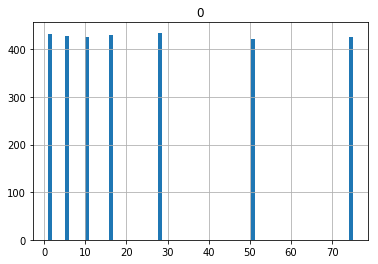

In [77]:
pd.DataFrame(y_train).hist(bins=75)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ef4067400>]],
      dtype=object)

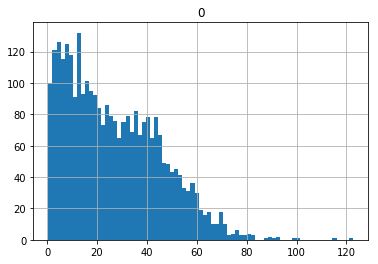

In [78]:
pd.DataFrame(outputs_train).hist(bins=75)

Vemos que a la red le cuesta estimar las edades exactamente como deberían ser, debido a la continuidad de los valores de salida. Por ejemplo, en las etiquetas, hay saltos entre 28, 51 y 75 años. En las salidas, hay todo tipo de valores intermedios, por lo que puede generarse un gran error cuadrático.

Haremos otra prueba con otra capa oculta y un learning rate menos, junto con una capa con activación sigmoidal en la mitad, de manera de que se parezca más a una red de clasificación en esa capa:

In [79]:
model, history = test_model(
    X_train_scaled.drop(columns=(faceGist_columns + fimg_columns), axis=1),
    X_val_scaled.drop(columns=(faceGist_columns + fimg_columns), axis=1),
    y_train, y_val, hidden_units=[100, 66, 10, 30],
    regularizer_kind=regularizers.l2, regularizer_param=0.1,
    hidden_activation=activations.relu, learning_rate=0.00001,
    epochs=2000, apply_sigmoid=2)
best_model = model

Train on 3000 samples, validate on 500 samples
Epoch 1/2000
3000/3000 [==============================] - 3s 986us/step - loss: 1335.0307 - val_loss: 1389.1857
Epoch 2/2000
3000/3000 [==============================] - 0s 122us/step - loss: 1334.9029 - val_loss: 1389.0567
Epoch 3/2000
3000/3000 [==============================] - 0s 123us/step - loss: 1334.7761 - val_loss: 1388.9274
Epoch 4/2000
3000/3000 [==============================] - 0s 122us/step - loss: 1334.6487 - val_loss: 1388.7979
Epoch 5/2000
3000/3000 [==============================] - 0s 123us/step - loss: 1334.5203 - val_loss: 1388.6660
Epoch 6/2000
3000/3000 [==============================] - 0s 122us/step - loss: 1334.3900 - val_loss: 1388.5325
Epoch 7/2000
3000/3000 [==============================] - 0s 122us/step - loss: 1334.2574 - val_loss: 1388.3957
Epoch 8/2000
3000/3000 [==============================] - 0s 122us/step - loss: 1334.1217 - val_loss: 1388.2556
Epoch 9/2000
3000/3000 [==============================] -

Resulta ser uno de los mejores modelos en todas las pruebas realizadas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ee7756ac8>]],
      dtype=object)

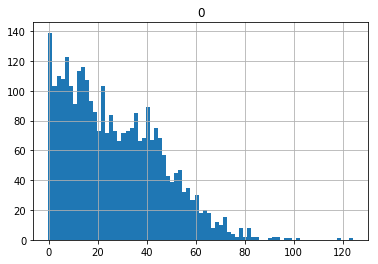

In [80]:
outputs_train = model.predict(X_train_scaled.drop(columns=(faceGist_columns + fimg_columns), axis=1))
pd.DataFrame(outputs_train).hist(bins=75)

Vemos que este modelo logra una métrica de validación y entrenamiento menos, pero aun tiene el problema de los rangos de edades. Probablemente disminuyendo ese problema consigamos un error menor.

Probaremos entonces a continuación lo recomendado en esta pregunta, que es tratar el problema como un problema de clasificación.

In [81]:
from keras import backend
from keras import utils

ages_to_classes = {1: 0,
                   5: 1,
                   10: 2,
                   16: 3,
                   28: 4,
                   51: 5,
                   75: 6}
y_train_classes = [ages_to_classes[int(one)] for one in y_train]
y_val_classes = [ages_to_classes[int(one)] for one in y_val]
y_test_classes = [ages_to_classes[int(one)] for one in y_test]
y_train_onehot = utils.to_categorical(y_train_classes, num_classes=7)
y_val_onehot = utils.to_categorical(y_val_classes, num_classes=7)
y_test_onehot = utils.to_categorical(y_test_classes, num_classes=7)

In [82]:
y_train_onehot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

A continuación, programamos una llamada para keras que calcula el error cuadrático medio a partir de los valores estimados por la red neuronal de clasificación. Para eso se usaron las funciones gather y argmax de tensorflow. Además, otra versión que utiliza sólo numpy para comprobar resultados.

In [83]:
from keras import metrics

classes_to_ages = backend.constant([1.0, 5.0, 10.0, 16.0, 28.0, 51.0, 75.0], shape=(7,))
np_classes_to_ages = np.array([1.0, 5.0, 10.0, 16.0, 28.0, 51.0, 75.0])


def my_mse(y_true, y_pred):
    a = backend.gather(classes_to_ages, backend.argmax(y_true))
    b = backend.gather(classes_to_ages, backend.argmax(y_pred))
    return metrics.mean_squared_error(a, b)


def np_mse(y_true, y_pred):
    a = np.take(np_classes_to_ages, np.argmax(y_true))
    b = np.take(np_classes_to_ages, np.argmax(y_pred))
    return np.mean((a - b) ** 2)

Comprobamos que da error 0 para las mismas etiquetas:

In [84]:
np_mse(y_train_onehot, y_train_onehot)

0.0

In [85]:
def test_model2(x_train, x_val,
                hidden_units=None, hidden_activation=None, epochs=20,
                learning_rate=0.01, regularizer_kind=None, regularizer_param=0.0,
                apply_sigmoid=-1):

    def correct_regularizer():
        if regularizer_kind:
            return regularizer_kind(regularizer_param)
        return None

    model = models.Sequential()
    if hidden_activation is None:
        hidden_activation = activations.sigmoid
    if hidden_units is None:
        hidden_units = [256, 256]
    for position, number_units in enumerate(hidden_units):
        current_activation = activations.sigmoid if position == apply_sigmoid else hidden_activation
        model.add(layers.Dense(number_units, input_dim=x_train.shape[1],
                               kernel_initializer='uniform',
                               kernel_regularizer=correct_regularizer(),
                               activation=hidden_activation))
    model.add(layers.Dense(7, kernel_initializer='uniform',
                           activation=activations.softmax))
    model.compile(optimizer=optimizers.Adam(lr=learning_rate), loss=losses.categorical_crossentropy,
                  metrics=[my_mse])
    history = model.fit(x_train, y_train_onehot, epochs=epochs, verbose=1, batch_size=32,
                        validation_data=(x_val, y_val_onehot))
    return model, history

A continuación algunas pruebas varias, cambiando la cantidad y tamaño de las capas ocultas, junto con qué características utilizamos.

In [86]:
model, history = test_model2(
    X_train_scaled.drop(columns=(faceGist_columns + fimg_columns), axis=1),
    X_val_scaled.drop(columns=(faceGist_columns + fimg_columns), axis=1),
    hidden_units=[100, 66, 33, 10],
    #regularizer_kind=regularizers.l1, regularizer_param=0.01,
    hidden_activation=activations.relu, learning_rate=0.00001,
    epochs=1000)

Train on 3000 samples, validate on 500 samples
Epoch 1/1000
3000/3000 [==============================] - 3s 939us/step - loss: 1.9459 - my_mse: 902.0947 - val_loss: 1.9459 - val_my_mse: 1184.5040
Epoch 2/1000
3000/3000 [==============================] - 0s 121us/step - loss: 1.9459 - my_mse: 804.2283 - val_loss: 1.9459 - val_my_mse: 885.1820
Epoch 3/1000
3000/3000 [==============================] - 0s 122us/step - loss: 1.9459 - my_mse: 898.8337 - val_loss: 1.9459 - val_my_mse: 774.0900
Epoch 4/1000
3000/3000 [==============================] - 0s 124us/step - loss: 1.9459 - my_mse: 764.3003 - val_loss: 1.9459 - val_my_mse: 798.1420
Epoch 5/1000
3000/3000 [==============================] - 0s 123us/step - loss: 1.9459 - my_mse: 791.6510 - val_loss: 1.9459 - val_my_mse: 813.3080
Epoch 6/1000
3000/3000 [==============================] - 0s 129us/step - loss: 1.9459 - my_mse: 791.1780 - val_loss: 1.9459 - val_my_mse: 843.1800
Epoch 7/1000
3000/3000 [==============================] - 0s 122

In [87]:
model, history = test_model2(
    X_train_scaled.drop(columns=fimg_columns, axis=1),
    X_val_scaled.drop(columns=fimg_columns, axis=1),
    hidden_units=[100, 100, 10],
    regularizer_kind=regularizers.l2, regularizer_param=0.001,
    hidden_activation=activations.relu, learning_rate=0.00001,
    epochs=1000)

Train on 3000 samples, validate on 500 samples
Epoch 1/1000
3000/3000 [==============================] - 3s 993us/step - loss: 2.0086 - my_mse: 728.5770 - val_loss: 2.0074 - val_my_mse: 782.4380
Epoch 2/1000
3000/3000 [==============================] - 0s 130us/step - loss: 2.0060 - my_mse: 723.6287 - val_loss: 2.0049 - val_my_mse: 765.0460
Epoch 3/1000
3000/3000 [==============================] - 0s 132us/step - loss: 2.0035 - my_mse: 700.5777 - val_loss: 2.0024 - val_my_mse: 767.7640
Epoch 4/1000
3000/3000 [==============================] - 0s 130us/step - loss: 2.0011 - my_mse: 688.8813 - val_loss: 2.0001 - val_my_mse: 737.6200
Epoch 5/1000
3000/3000 [==============================] - 0s 128us/step - loss: 1.9988 - my_mse: 693.3137 - val_loss: 1.9978 - val_my_mse: 741.6240
Epoch 6/1000
3000/3000 [==============================] - 0s 131us/step - loss: 1.9965 - my_mse: 682.1983 - val_loss: 1.9957 - val_my_mse: 746.4280
Epoch 7/1000
3000/3000 [==============================] - 0s 129u

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ee6056518>]],
      dtype=object)

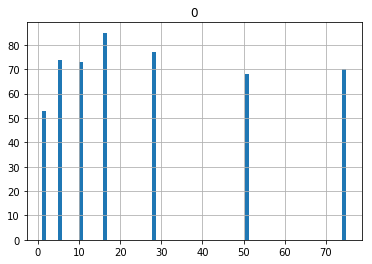

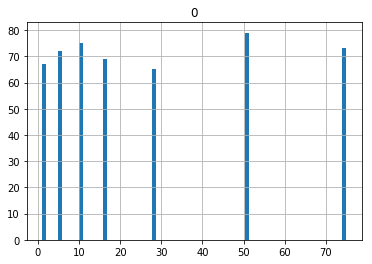

In [88]:
results = np.take(np_classes_to_ages, np.argmax(model.predict(X_val_scaled.drop(columns=fimg_columns, axis=1)), axis=1))
pd.DataFrame(results).hist(bins=75)
pd.DataFrame(y_val).hist(bins=75)

Una prueba eliminando las columnas `genFeat`, que hablan de los vecinos en la foto original. Como queremos considerar caras individuales, vemos que pasa en ellas sin estas características.

In [89]:
model, history = test_model(
    X_train_scaled.drop(columns=(genFeat_columns + fimg_columns), axis=1),
    X_val_scaled.drop(columns=(genFeat_columns + fimg_columns), axis=1),
    y_train, y_val,
    hidden_units=[100, 50, 20],
    regularizer_kind=regularizers.l1, regularizer_param=0.01,
    hidden_activation=activations.relu, learning_rate=0.0001,
    epochs=1000)

Train on 3000 samples, validate on 500 samples
Epoch 1/1000
3000/3000 [==============================] - 3s 970us/step - loss: 1347.7823 - val_loss: 1397.0346
Epoch 2/1000
3000/3000 [==============================] - 0s 121us/step - loss: 1322.5871 - val_loss: 1323.6715
Epoch 3/1000
3000/3000 [==============================] - 0s 122us/step - loss: 1091.8998 - val_loss: 866.4257
Epoch 4/1000
3000/3000 [==============================] - 0s 119us/step - loss: 651.0745 - val_loss: 539.9419
Epoch 5/1000
3000/3000 [==============================] - 0s 120us/step - loss: 529.9578 - val_loss: 510.1986
Epoch 6/1000
3000/3000 [==============================] - 0s 120us/step - loss: 500.9115 - val_loss: 494.0841
Epoch 7/1000
3000/3000 [==============================] - 0s 119us/step - loss: 480.7114 - val_loss: 485.2846
Epoch 8/1000
3000/3000 [==============================] - 0s 118us/step - loss: 463.5241 - val_loss: 475.7892
Epoch 9/1000
3000/3000 [==============================] - 0s 121us/s

Otra prueba, sin considerar ninguna característica de los vecinos ni de la foto en si.

In [90]:
model, history = test_model(
    X_train_scaled.drop(columns=(genFeat_columns + faceGist_columns + fimg_columns), axis=1),
    X_val_scaled.drop(columns=(genFeat_columns + faceGist_columns + fimg_columns), axis=1),
    y_train, y_val,
    hidden_units=[20, 20],
    # regularizer_kind=regularizers.l1, regularizer_param=0.01,
    hidden_activation=activations.relu, learning_rate=0.0001,
    epochs=1000)

Train on 3000 samples, validate on 500 samples
Epoch 1/1000
3000/3000 [==============================] - 3s 945us/step - loss: 1333.5870 - val_loss: 1387.2794
Epoch 2/1000
3000/3000 [==============================] - 0s 98us/step - loss: 1332.3077 - val_loss: 1385.4157
Epoch 3/1000
3000/3000 [==============================] - 0s 95us/step - loss: 1329.5529 - val_loss: 1381.3906
Epoch 4/1000
3000/3000 [==============================] - 0s 97us/step - loss: 1323.8754 - val_loss: 1373.7174
Epoch 5/1000
3000/3000 [==============================] - 0s 97us/step - loss: 1313.8101 - val_loss: 1360.8108
Epoch 6/1000
3000/3000 [==============================] - 0s 96us/step - loss: 1297.1128 - val_loss: 1340.4022
Epoch 7/1000
3000/3000 [==============================] - 0s 97us/step - loss: 1272.2261 - val_loss: 1311.3962
Epoch 8/1000
3000/3000 [==============================] - 0s 98us/step - loss: 1238.5766 - val_loss: 1273.9231
Epoch 9/1000
3000/3000 [==============================] - 0s 99u

En conclusión, nunca logramos un error de validación menor a 265. Ahora veremos cómo se comportaría el mejor modelo obtenido anteriormente en el conjunto de pruebas (notar que no lo utilizamos en ningún momento, hasta ahora). Vemos que el error es mayor que en el entrenamiento y validación, resultando parecido a la mayoría de los modelos experimentados.

325.9910149935011


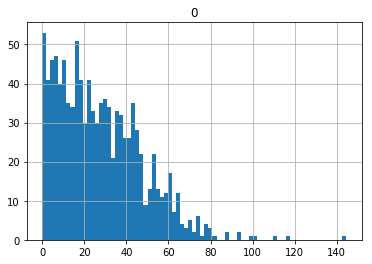

In [91]:
results = best_model.predict(X_test_scaled.drop(columns=(faceGist_columns + fimg_columns), axis=1))
pd.DataFrame(results).hist(bins=75)
mean_error = np.mean((results - y_test) ** 2)
print(mean_error)

Ese fue nuestro error final de test.

<a id="refs"></a>
## Referencias
[1] Glorot, X., & Bengio, Y. (2010, March). *Understanding the difficulty of training deep feedforward neural networks*. In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 249-256).    
[2]  He, K., Zhang, X., Ren, S., & Sun, J. (2015). *Delving deep into rectifiers: Surpassing human-level performance on imagenet classification*. In Proceedings of the IEEE international conference on computer vision (pp. 1026-1034).  
[3] Gallagher, A. C., & Chen, T. (2009, June). *Understanding images of groups of people*. In Computer Vision and Pattern Recognition, 2009. CVPR 2009. IEEE Conference on (pp. 256-263). IEEE.